## Краткое описание проекта

В данном проекте будут проанализированы данные по продажам игр, их оценке пользователями и критиками с целью подобрать оптимальные жанры игр и игровые платформы для рекламы в Северной Америке, Европе и Японии. Примерный план выглядит так: 
- Предобработка данных: заполнение пропусков, исправление ошибок, поиск дубликатов. 
- Исследовательский анализ данных: поиск оптимального периода для исследования, платформ и жанров в целом по миру, а также поиск взаимосвязи между продажами игр и оценками пользователей и критиков.
- Составление портрета пользователя по регионам: поиск оптимальных платформ, жанров для регионов, исследования влияния рейтинга ESRB. 
- Проверка гипотезы по поводу различия в оценках пользователей, играющих с разных платформ. 
- Проверка гипотезы по поводу различия в оценках игр разных жанров. 
- Общий вывод

In [81]:
import pandas as pd 

from scipy import stats as st
pd.options.mode.chained_assignment = None

## Первичное изучение данных

In [82]:
data = pd.read_csv('games.csv') 
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

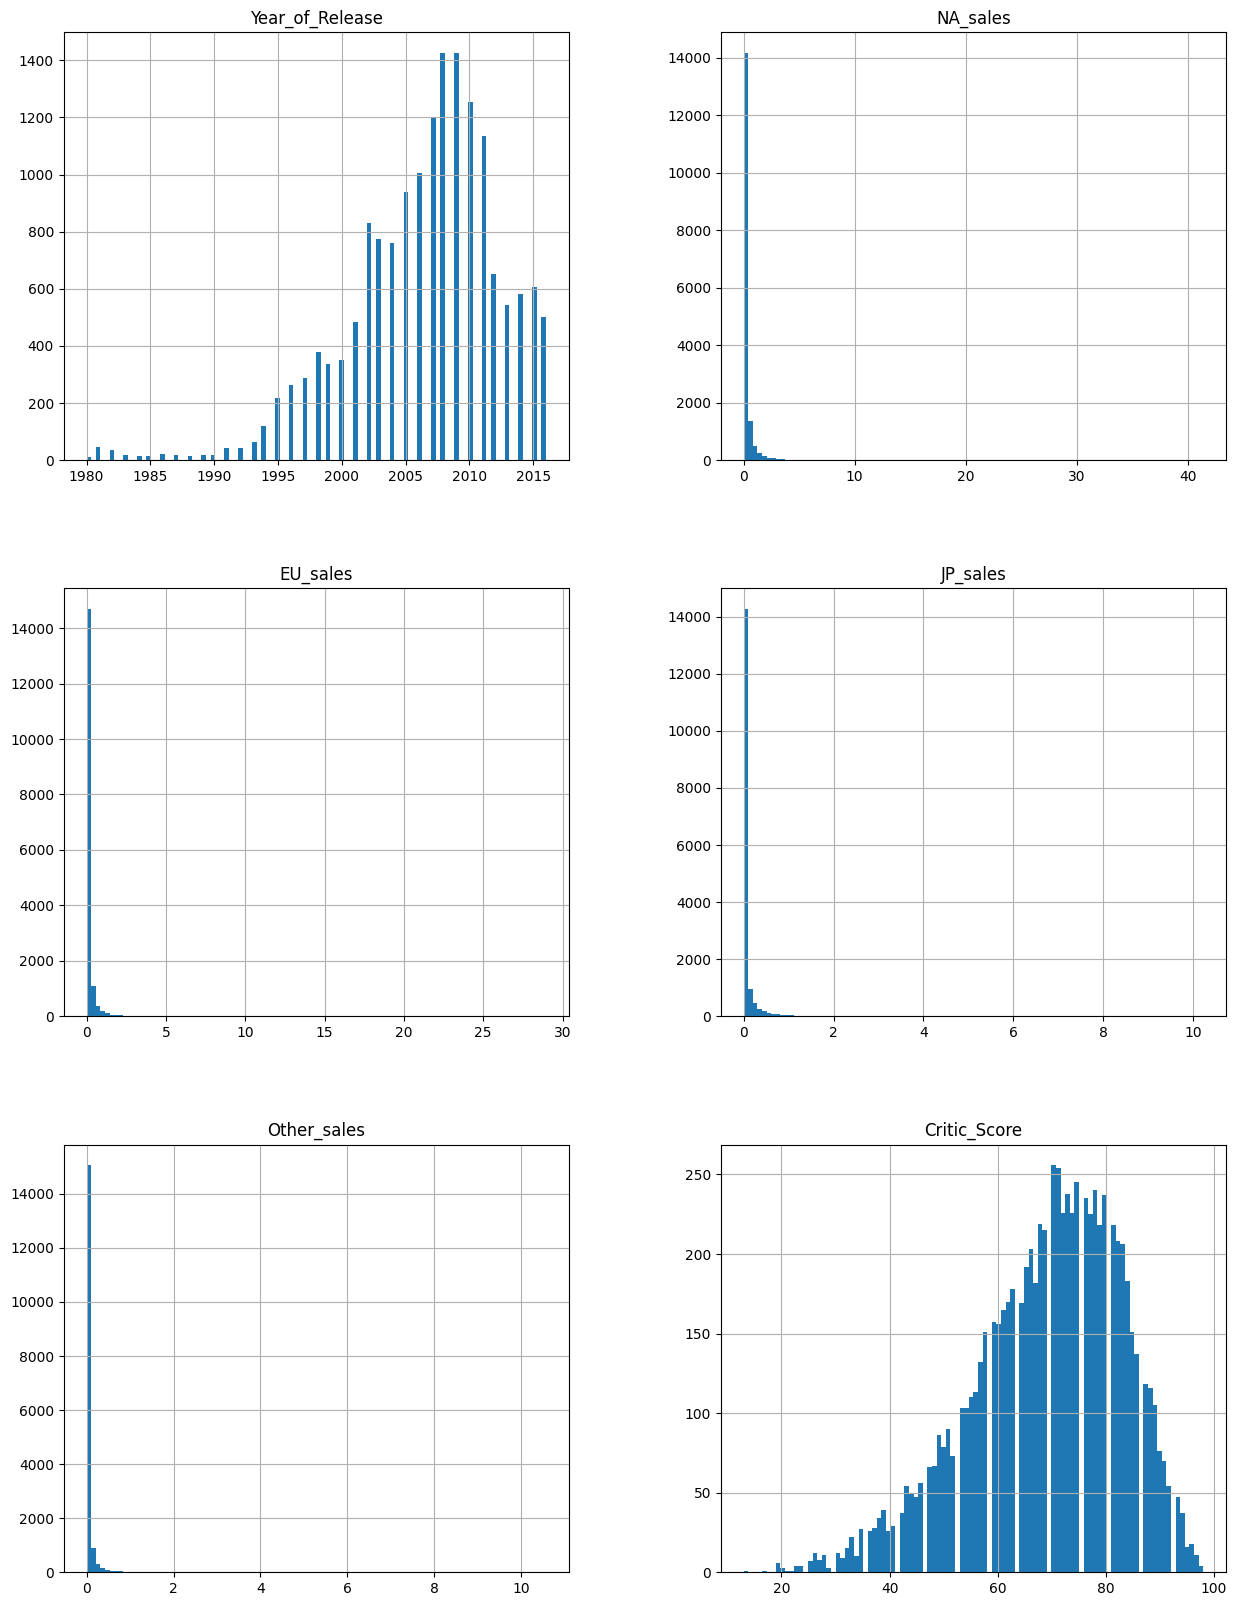

In [84]:
data.hist(figsize=(15, 20), bins=100)

Итак, перед нами данные по продажам игр в разных магазинах и по разныи регионам. Как можно заметить данные представлены с 1980 по 2016 год.  

## Предобработка данных

### Изменение названия столбцов

In [85]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Изменение типов данных в столбцах

In [86]:
data = data.astype({'year_of_release':'Int64'}) 
data = data.astype({'critic_score':'Int64'}) 
data.loc[data['user_score'] == 'tbd', 'user_score'] = None 
data = data.astype({'user_score':'float64'}) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Поменяем форматы данных на более удобные, в процессе уберем tbd(to be determined) из user_score - это, по сути, те же Nan. Воспользуемся старым форматом Int64 из numpy, чтобы можно было пока оставить пропуски.

In [87]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Обработка пропусков

In [88]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Имеем некоторое количество пробелов в данных: 
- 'name' - два пробела, сам столбец названий игр для нас не сильно важна, эти пробелы никак не мешают
- 'year_of_release' - 269 пробелов, все еще немного, можно просто удалить или заменить медианой, их всего лишь 1.6%, удалю.
- 'genre' - 2 пробела, можно либо удалить, либо посмотреть жанр по названию и внести руками, попробую второе
- 'critic_score' - 8578 пробелов - это уже довольно много, но это агрегированные данные, заполнять нельзя.
- 'user_score' - 9889 пробелов, аналогично предыдущему, заполнять нельзя.
- 'rating' - 6766 пробела, никак не заполнить, некоторые игры могли просто не получать рейтинг по тем или иным причинам, например, если они не продаются в США или в Канаде, придется оставить как есть

In [89]:
data = data[data['year_of_release'].notna()]

In [90]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Идея была хорошая, но не получится, это как раз те строки, где пропущены имена.

In [91]:
data = data[data['genre'].notna()]

In [92]:
list_of_genres= list(data['genre'].unique())
list_of_genres

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [93]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Итак, убраны все пропуски в столбцах, кроме, "critic_score", "user_score", посколько они являются уже усредненными данными, и "rating", так как это категориальные данные. 

### Поиск дубликатов

In [94]:
data.duplicated().sum()

0

Отлично, явных дубликатов нет. Посмотрим неявные в столбце с рейтингом.

In [95]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Они есть, "K-A" - устаревший аналог аналог современного "E", заменим.

In [96]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'  

In [97]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Отлично.

### Добавление нового столбца

In [98]:
data['overall_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data['overall_sales'].head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: overall_sales, dtype: float64

### Вывод по предобработке

Таким образом, мы убрали значительную часть пропусков, к сожалению, со столбцами "critic_score", "user_score" и "rating" что-то сделать не представляется возможным. Возмыжны слудующие причины появления пропуска в этих столбцах: 
- В "critic_score" и "user_score" - игра может быть достаточно старой, и к моменту ее выхода еще могло не быть сервисов по агрегированной оценке, вроде metacritic, также возможно ошибки при выгрузке данных. 
- В "rating" - поскольку данный рейтинг выставляется ESRB, которая начала свою деятельность только в 1994, то у игр вышедших до этого такого рейтинга может не быть, кроме того, данный рейтинг обязателен только для США и Канады, поэтому, если игра не продается в эти странах, то рейтинга у нее тоже может не быть.

In [99]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  overall_sales    16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ данных

### Динамика релиза и продаж игр

<Axes: title={'center': 'year of release'}, ylabel='Frequency'>

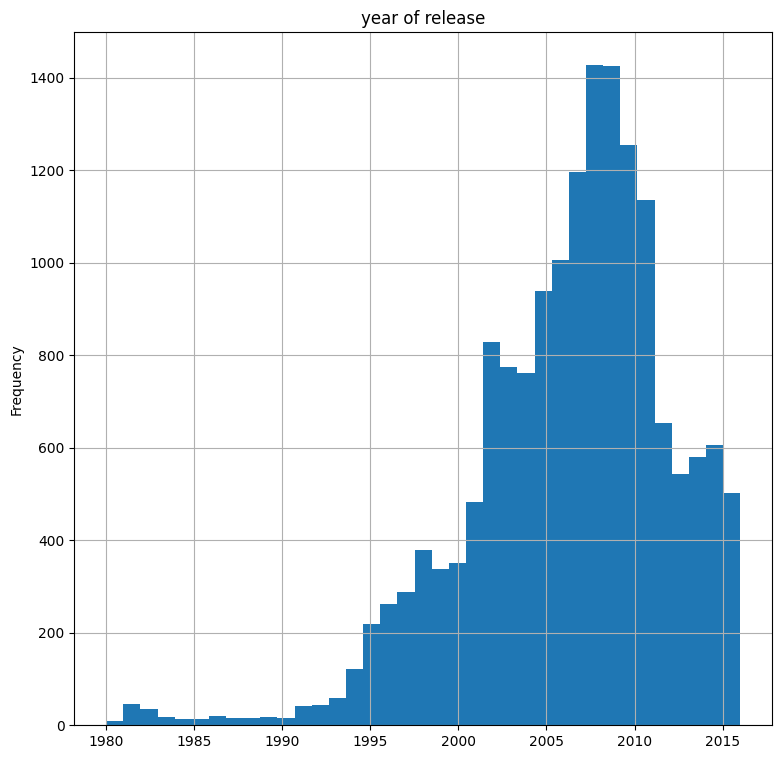

In [100]:
data['year_of_release'].plot(kind='hist', bins=37, title='year of release', grid=True, figsize=(9, 9))

Итак, с начала 90-ых годов заметен тренд на взрывной рост примерно до 2009, после этого произошло столь же резкое падение до уровней 2012 года и стабилизация около них. С точки зрения автора, данные до 2012 года отражают совершенно другую действительность и никак не помогут в прогнозах на 2017 год. Посмотрим на популярные платформы. 

In [101]:
data.groupby('platform')['overall_sales'].sum().sort_values(ascending=False) 

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: overall_sales, dtype: float64

<Axes: title={'center': 'jp_sales_per_genre'}, ylabel='overall_sales'>

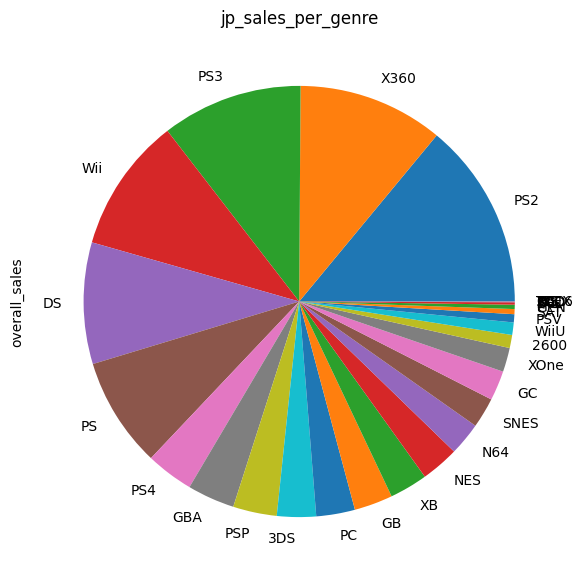

In [102]:
data.groupby('platform')['overall_sales'].sum().sort_values(ascending=False).plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales_per_genre')

Хвост выглядит вплохо, позднее сгруппирую платформы в незначительным количеством продаж в одну категорию. Сейчас посмотрим на распределение продаж по годам на платформах до XOne, она же xbox one. 

In [103]:
list_of_platform = data.groupby('platform').sum().query('overall_sales > 150').index 
list_of_platform = list(list_of_platform) 
list_of_platform

['3DS',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'SNES',
 'Wii',
 'X360',
 'XB',
 'XOne']

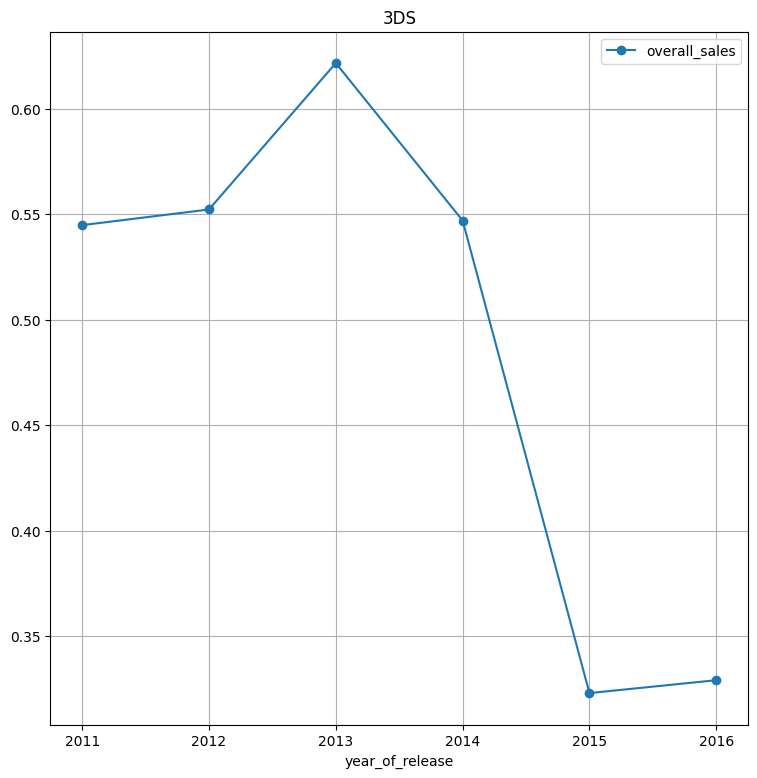

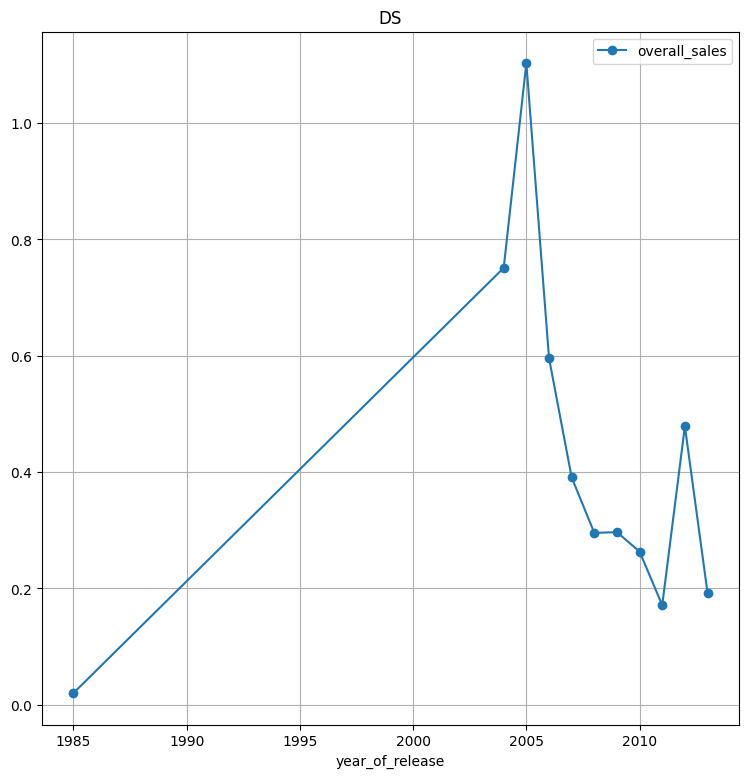

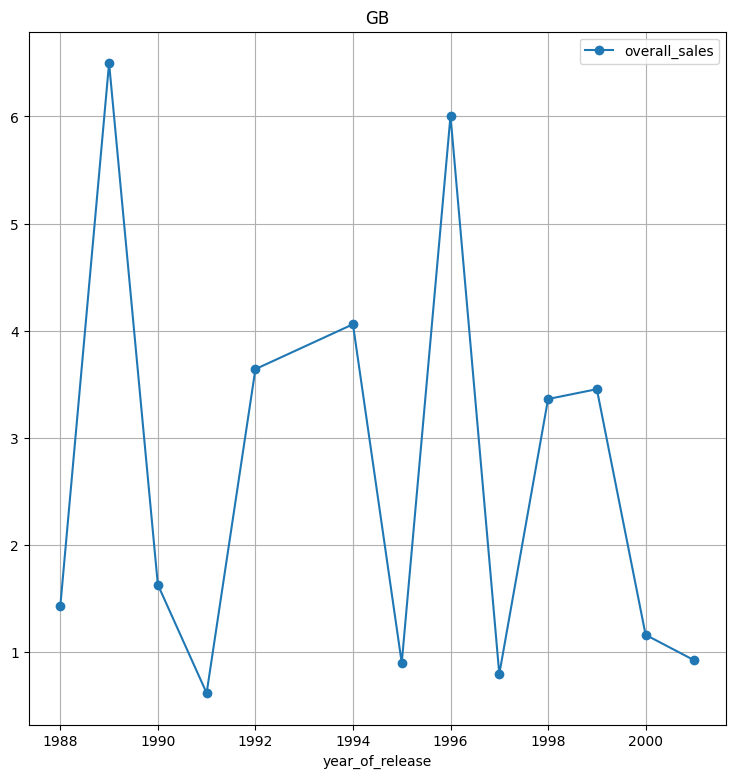

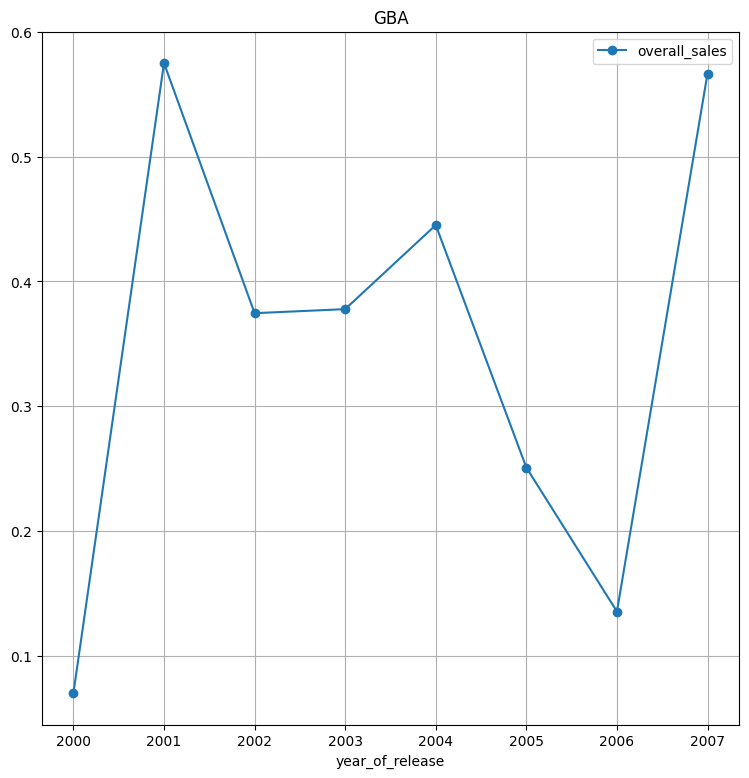

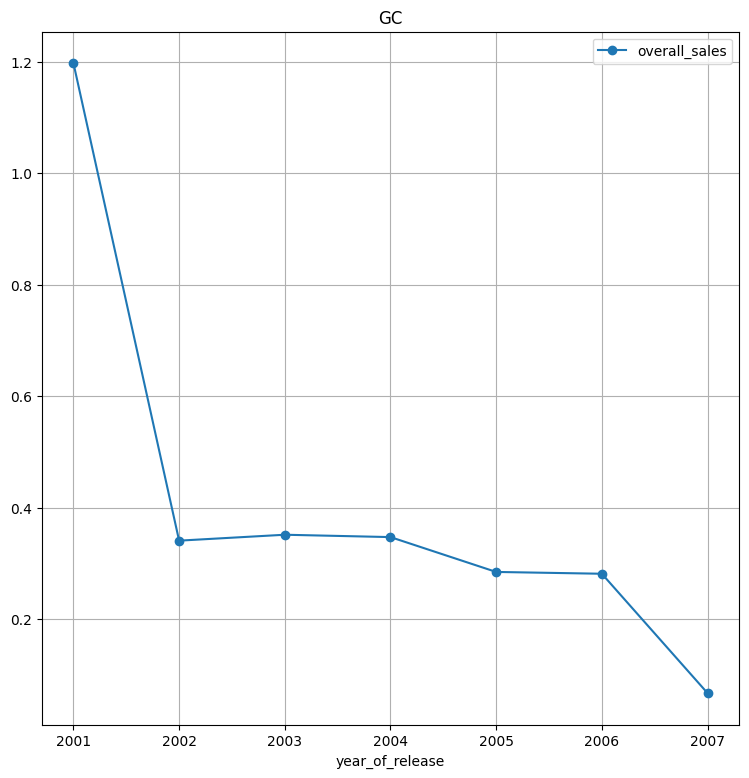

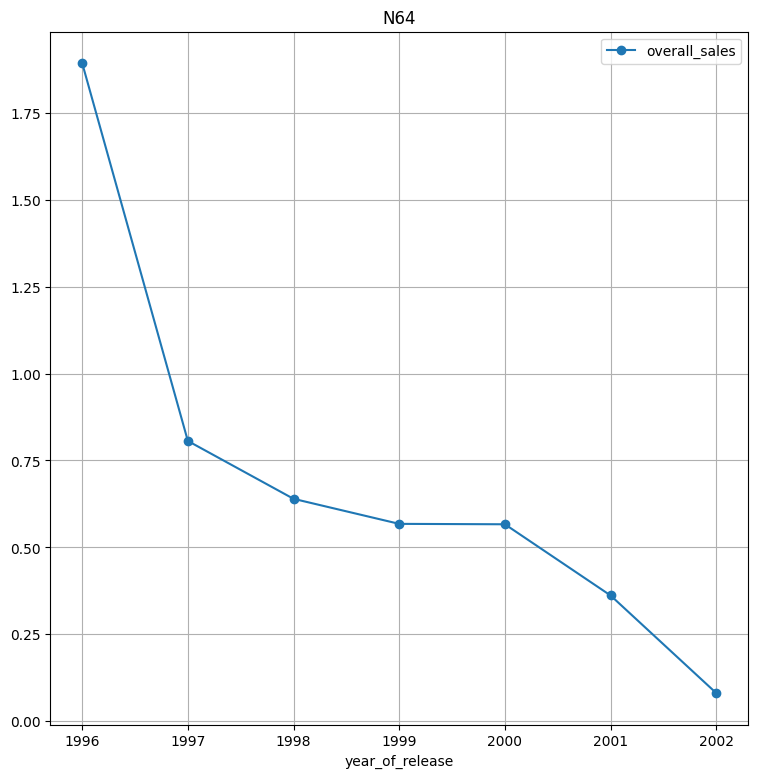

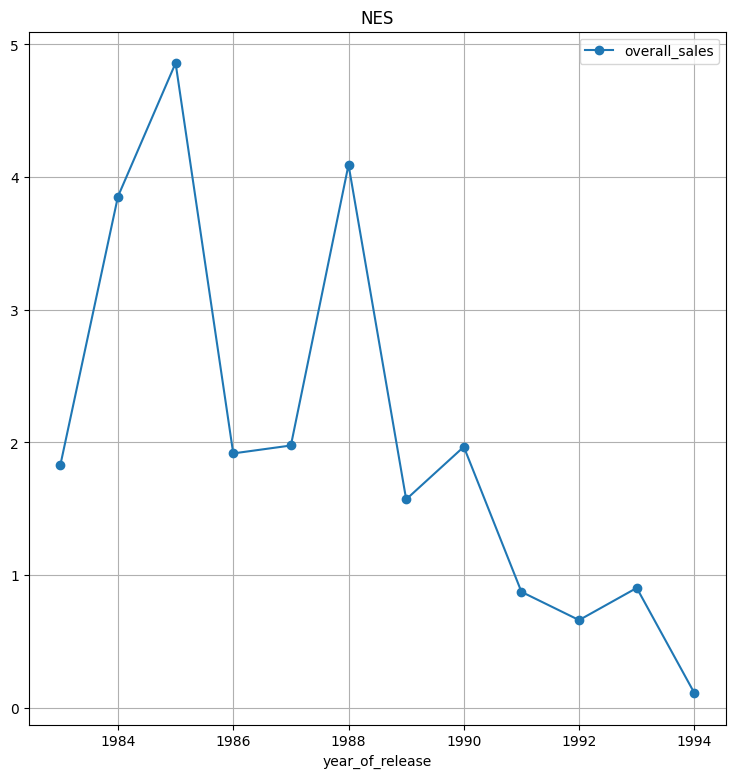

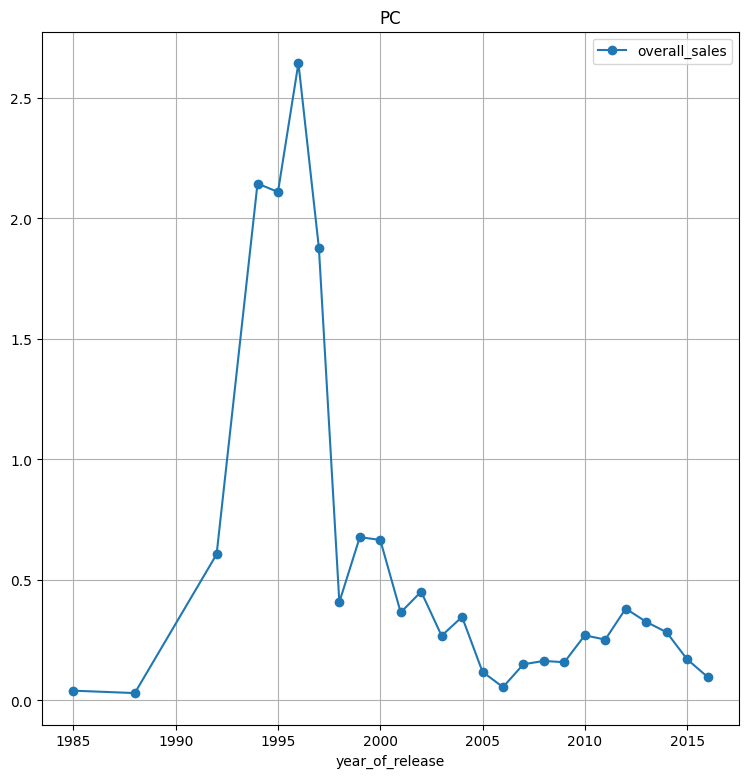

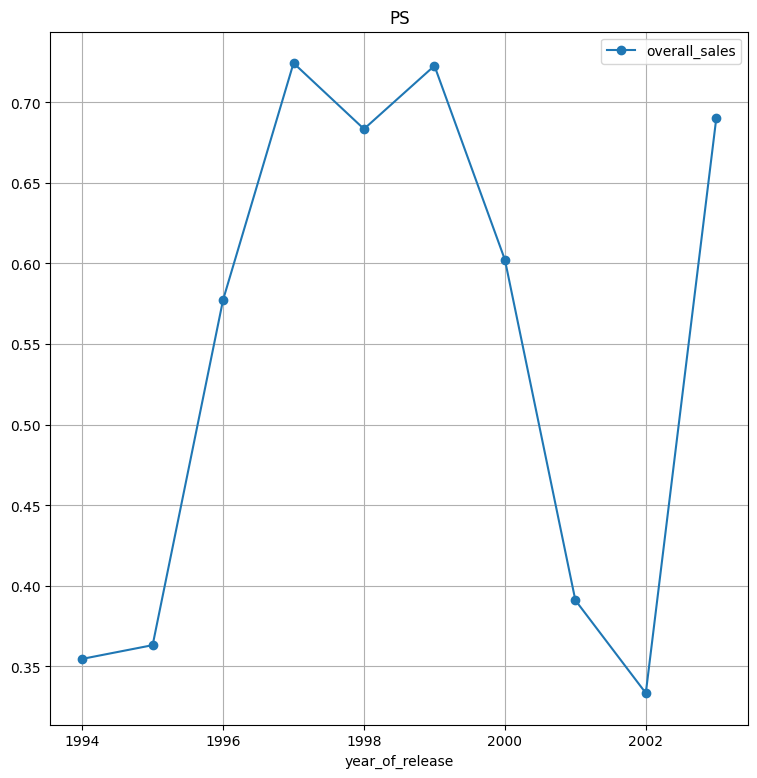

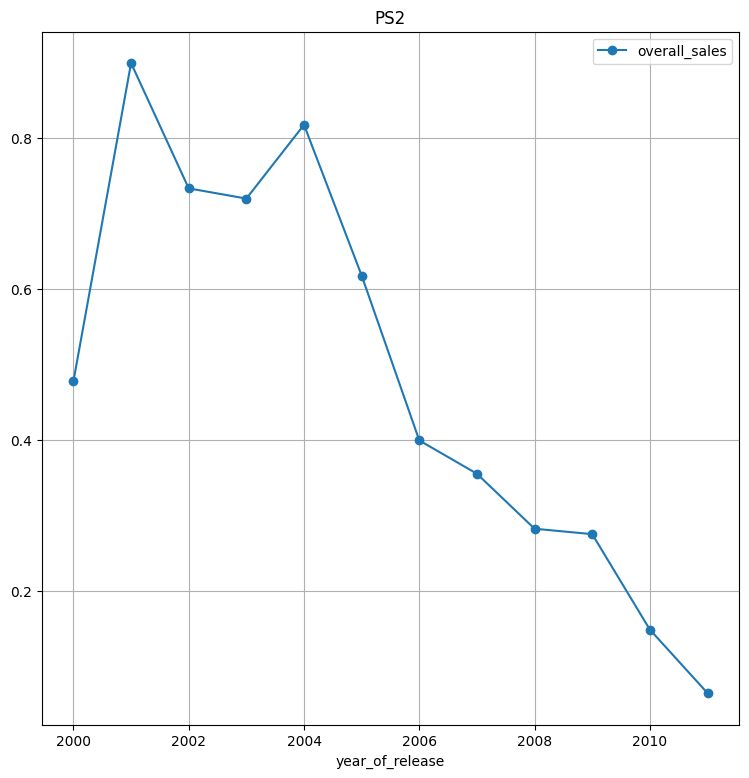

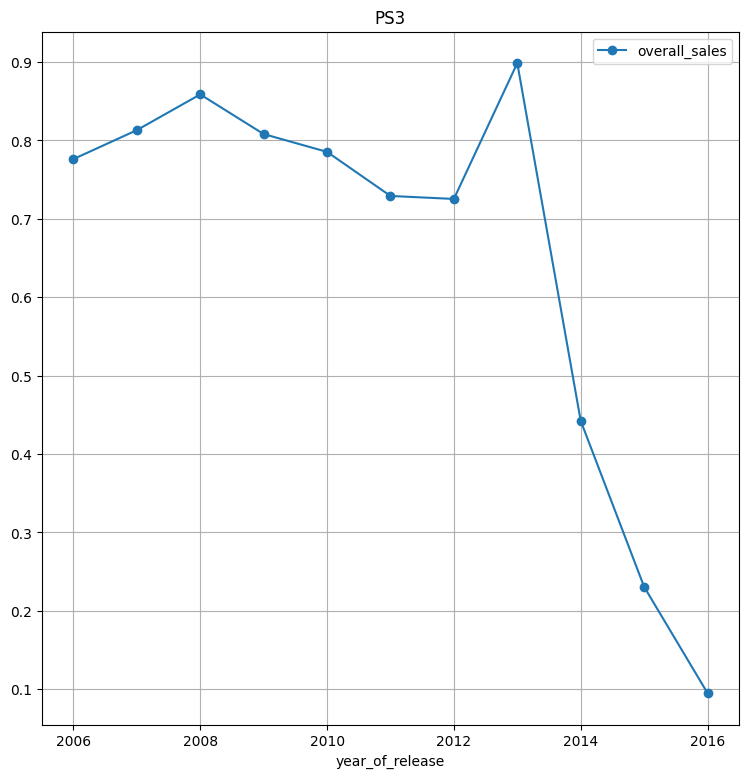

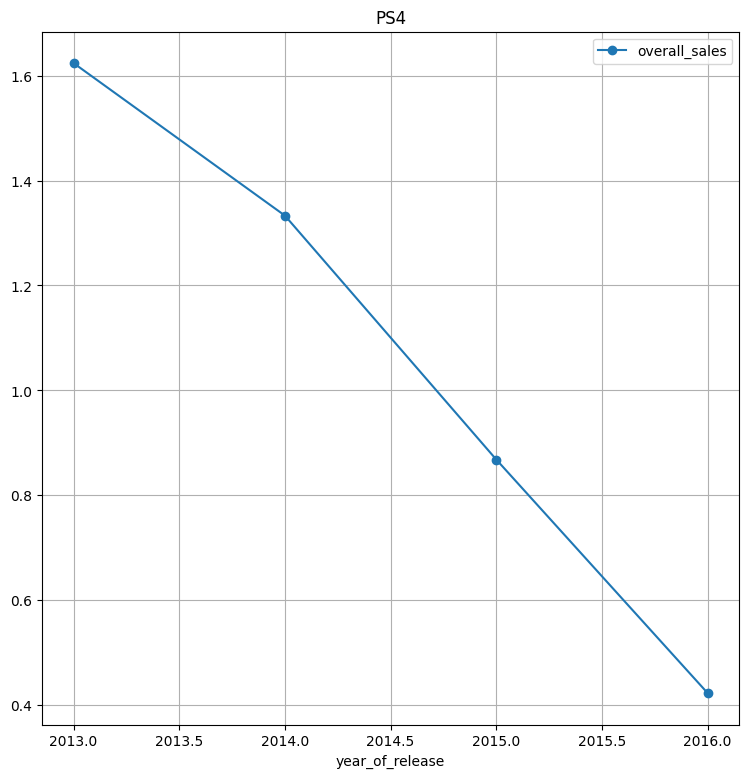

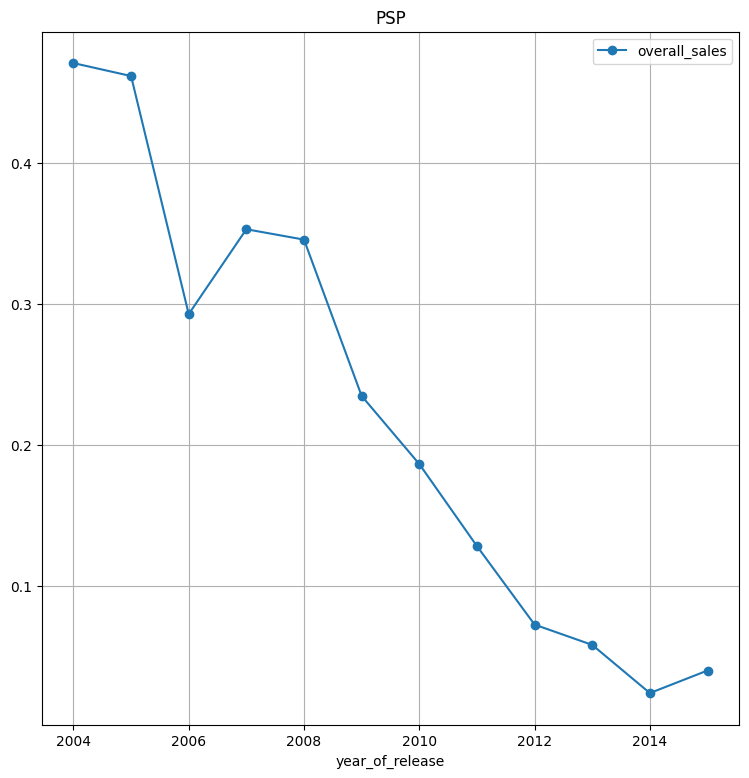

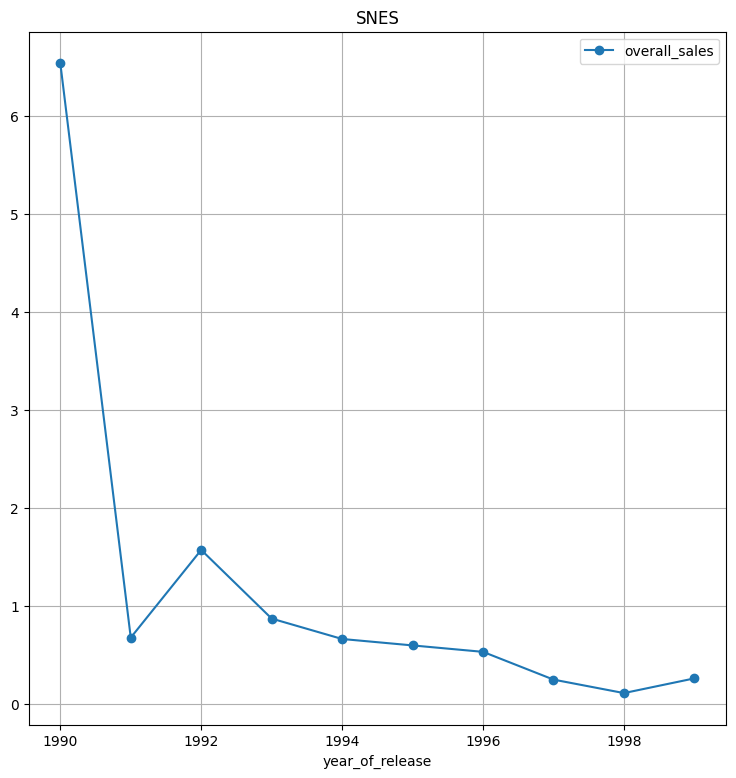

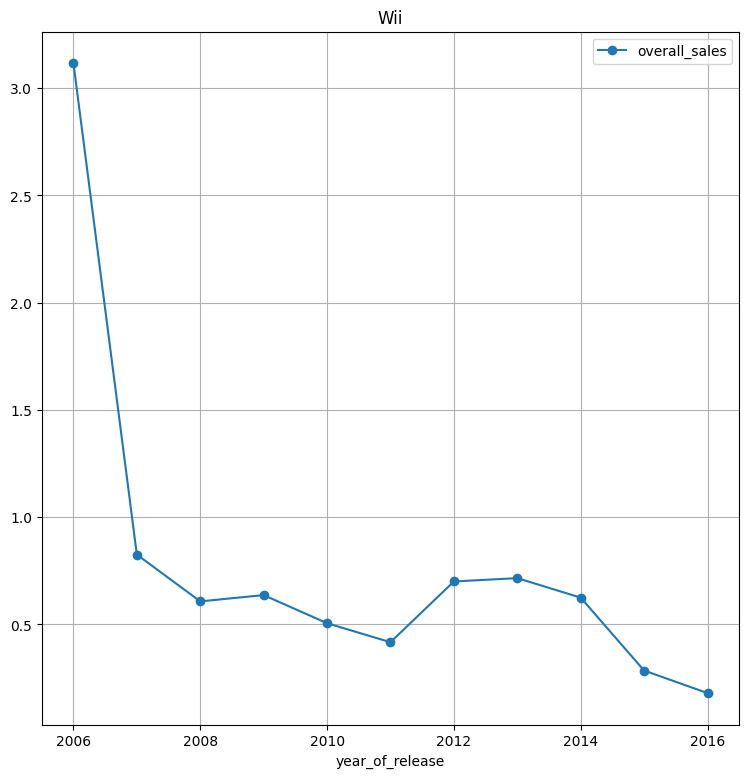

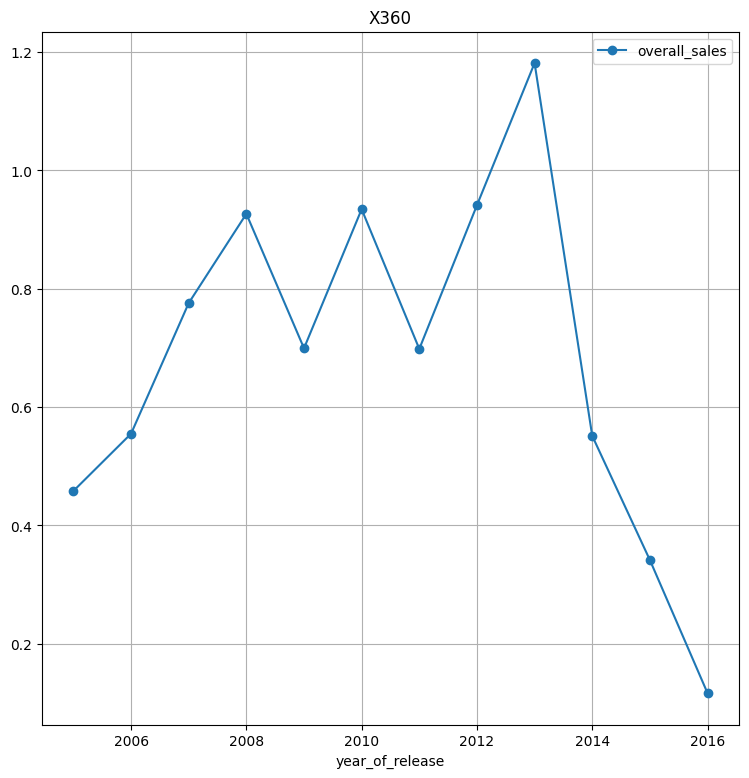

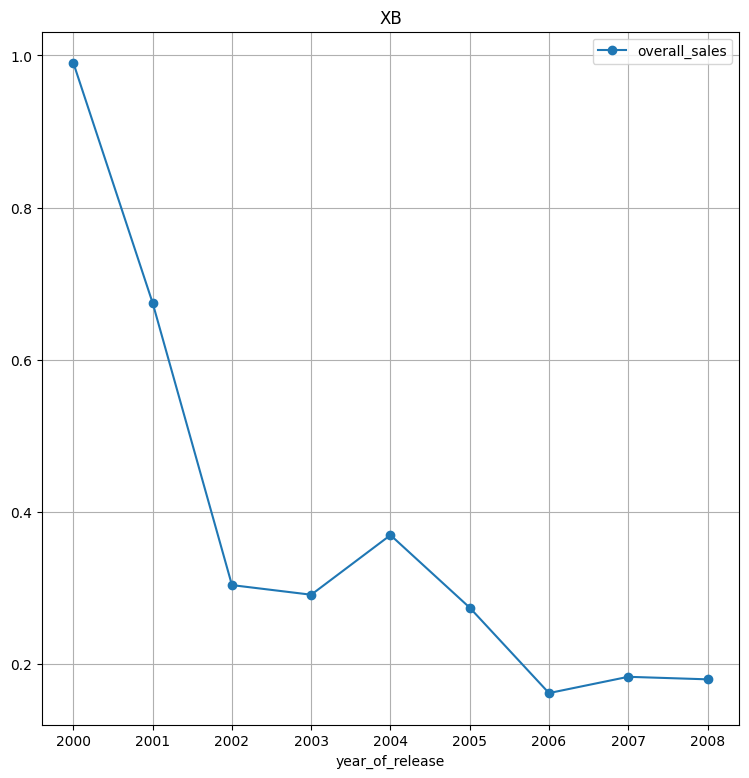

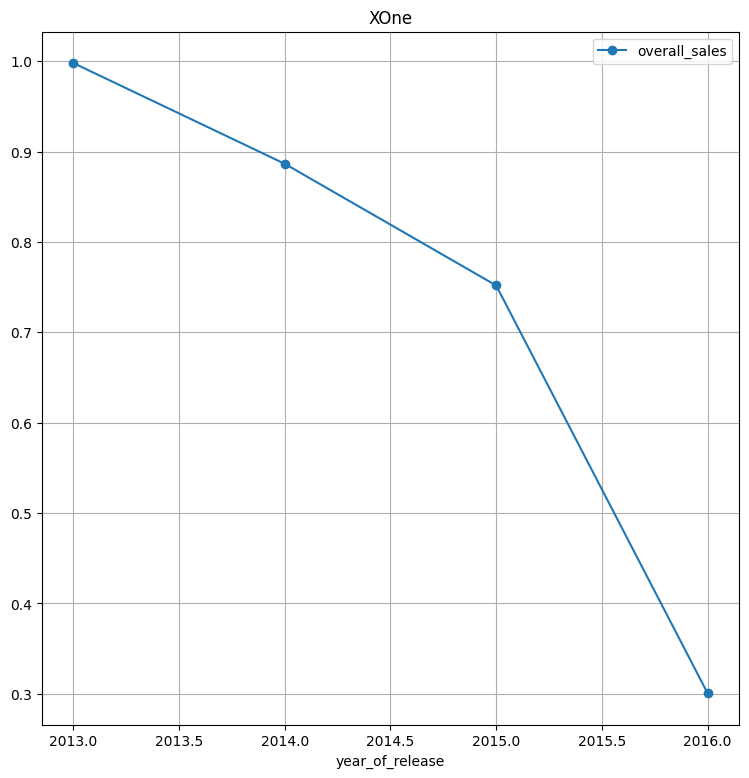

In [104]:
for name, group_data in data.groupby('platform'):
    if name in list_of_platform:
        group_data.pivot_table(index=group_data['year_of_release'], values='overall_sales').plot(grid=True, style='-o', figsize=(9, 9), title=name) 

Имеем следующую ситуацию, значительная часть платформ с наибольшими продажами вообще не должила до 2016 года, делать по ним какие бы то ни было прогнозы бессмысленно, а сам период жизни платформы можно оценить примерно в 10 лет. В "живой" части, аналогично общему графику релиза, заметен нисходящий тренд в последние года.

Таким образом, для дальнейшего анализа будут использованы данные начиная с 2012 года и новее, так можно будет захватить относительно старые, но все еще популярные на момент 2016 года платформы, а также относительно новые, которые продолжат быть актуальными еще значительный промежуток времени. Да, большая часть датасета будет потеряна, но для составления прогнозов на 2017 год она бесполезна.

In [105]:
new_data = data.query('year_of_release >= 2012')

### Анализ скорректированных данных

In [106]:
new_data.groupby('platform')['overall_sales'].sum().sort_values(ascending=False) 

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: overall_sales, dtype: float64

In [107]:
list_of_platform = new_data.groupby('platform').sum().query('overall_sales > 150').index 
list_of_platform = list(list_of_platform) 
list_of_platform

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

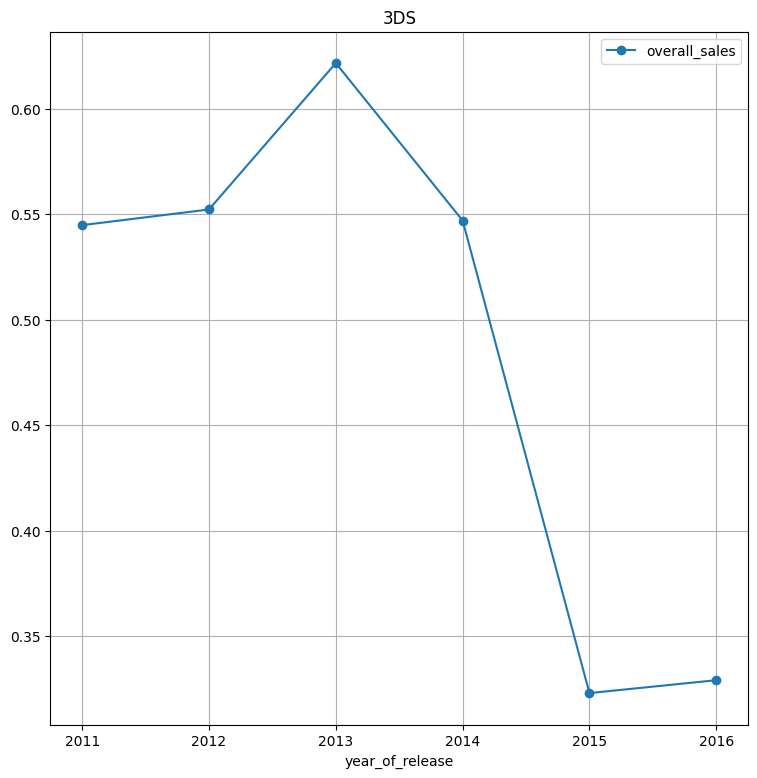

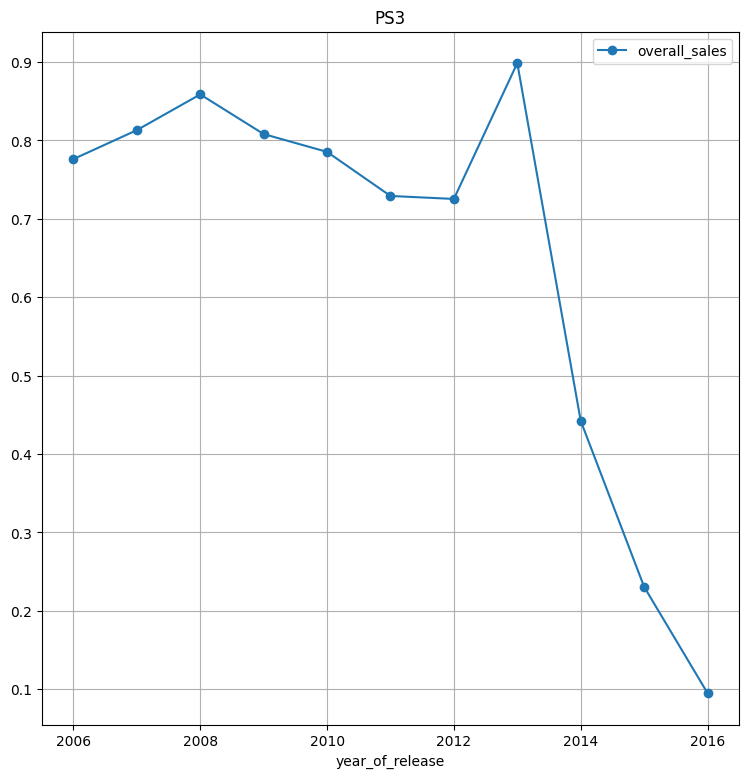

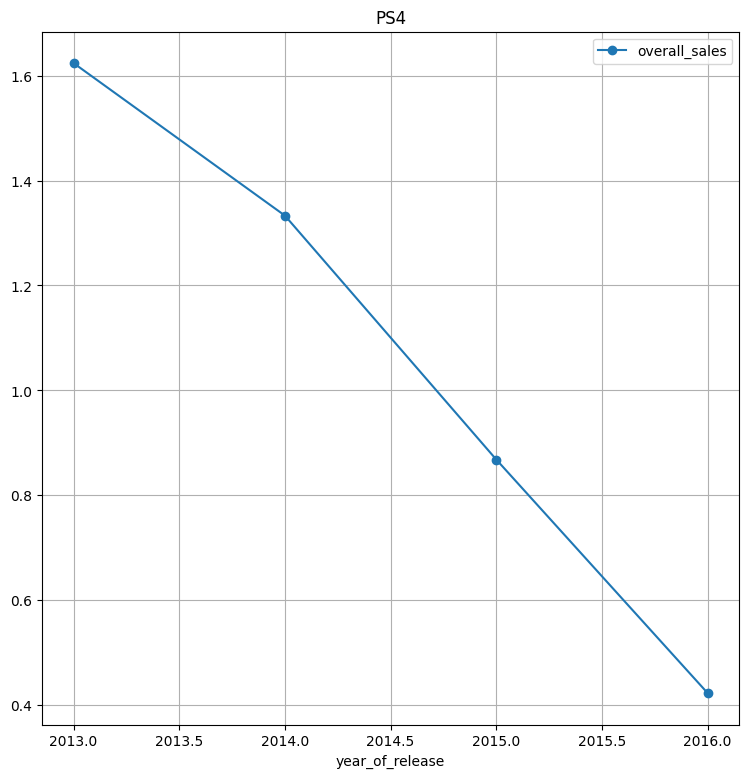

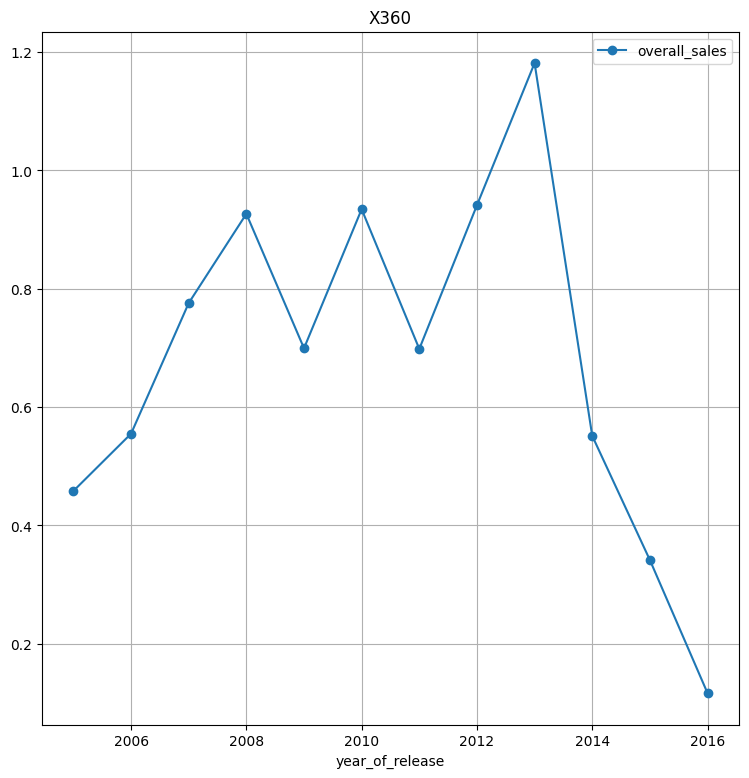

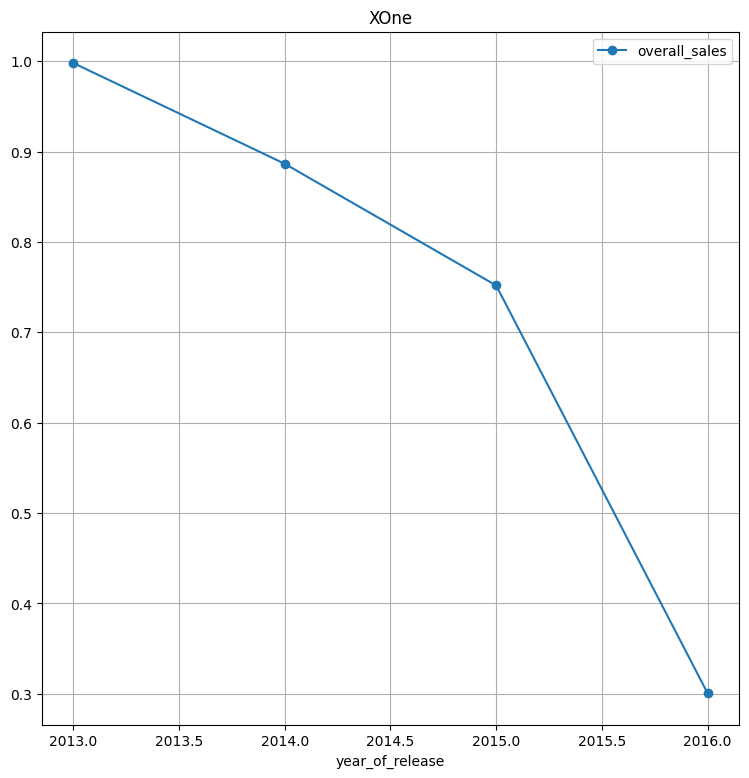

In [108]:
for name, group_data in data.groupby('platform'):
    if name in list_of_platform:
        group_data.pivot_table(index=group_data['year_of_release'], values='overall_sales').plot(grid=True, style='-o', figsize=(9, 9), title=name)
    

Как можно заметить, состав лидеров по продажам изменился, а количество платформ сократилось, лидирует PS4 на уровне в 314 миллионов проданных копий, а замыкает список неумирающая PSP со значением в 11 миллионов копий.
Однако, динамика продаж у всех платформ, кроме, пожалуй, 3DS и PSP, является явно убывающей. 
По итогу, я бы выделил PS4 и 3DS, как относительно новые(на рассматриваемый момент) консоли, которые уже имеют значительный объем продаж. С осторожностью следует относится к PS3 и X360, они все еще могут радовать продажами, но вместе с тем являются уже довольно старыми - на 2016 поддержка обоих была прекращена. Посмотрим боксплоты этих четырех платформ.

<Axes: title={'center': 'overall_sales'}, xlabel='platform'>

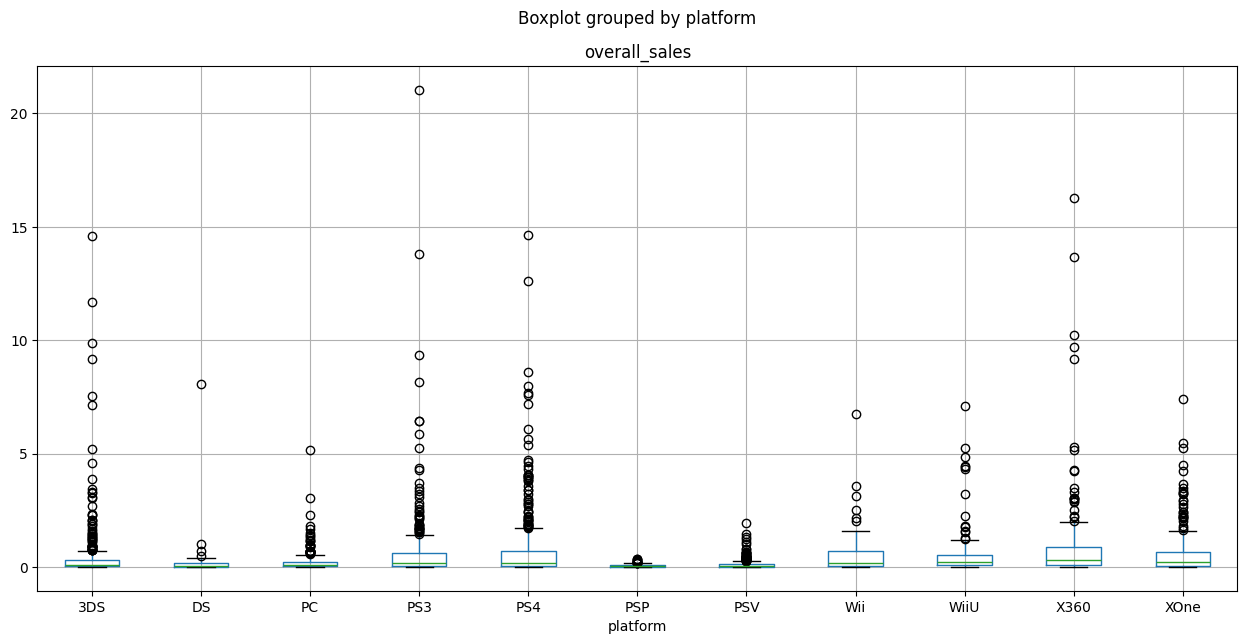

In [109]:
new_data.boxplot(column = 'overall_sales', by='platform', figsize=(15,7))

Интересно, но боксплоты слишком узкие, ограничим значения оси y.

[(0.0, 2.0)]

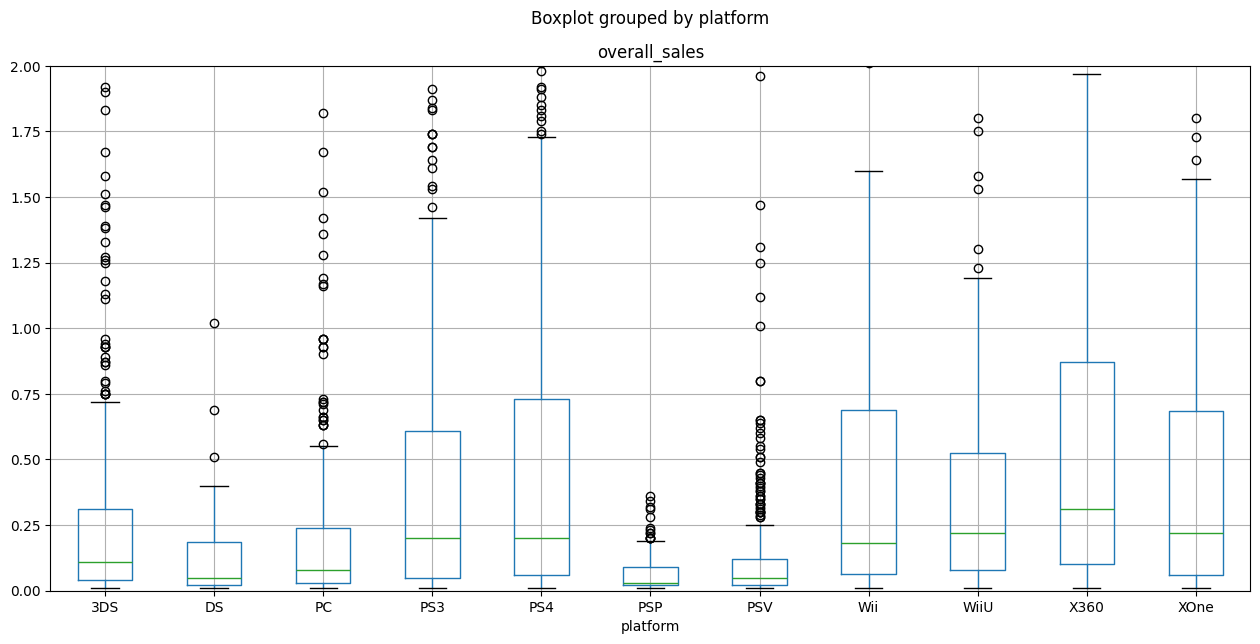

In [110]:
new_data.boxplot(column = 'overall_sales', by='platform', figsize=(15,7)).set(ylim=(0,2))

Как можно заметить, самые большие медианные продажи у X360 - порядка 0,3 млн копий, самые малые у PSP - околонулевые. Присутствует достаточно много выбросов.

### Поиск связи между отзывами и продажами

Для начала посмотрим на связь между продажами и оценкой критиков.

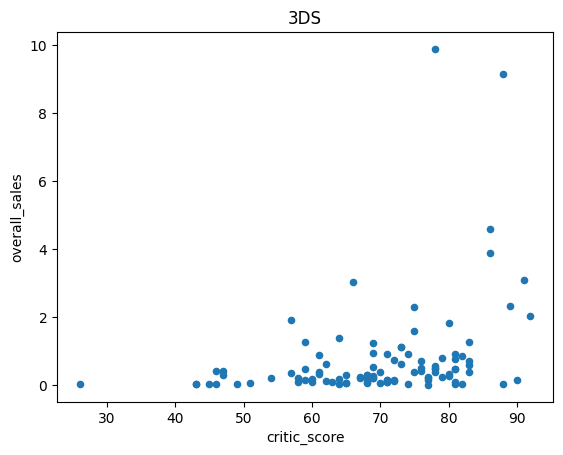

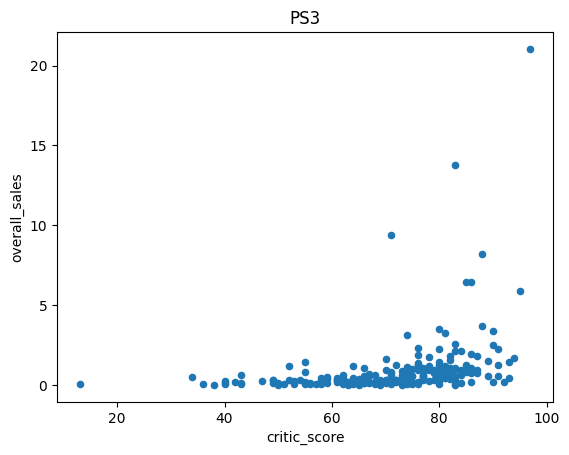

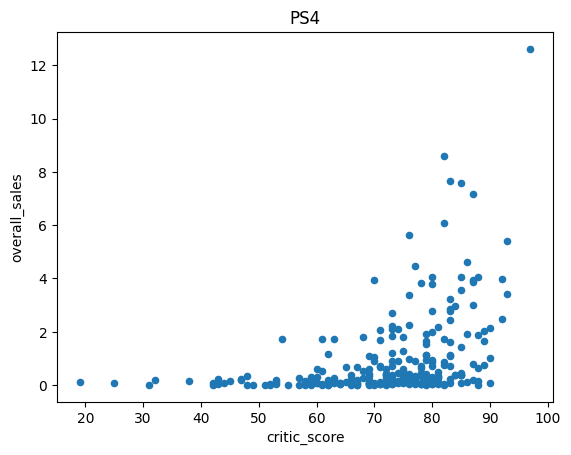

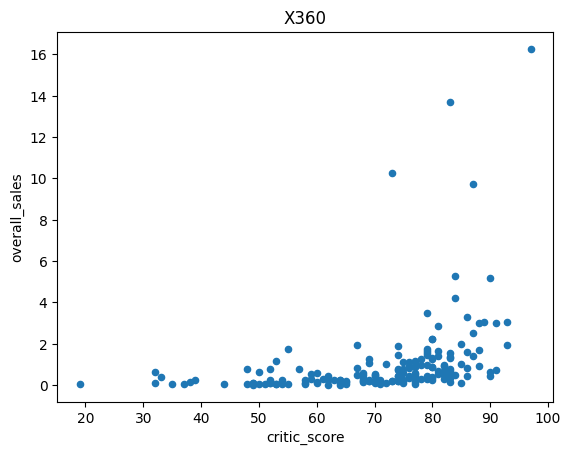

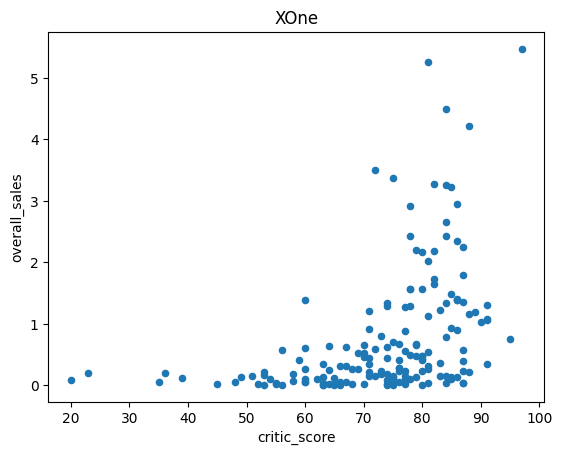

In [111]:
for name, group_data in new_data.groupby('platform'):
    if name in list_of_platform:
        group_data.plot.scatter(x='critic_score', y='overall_sales', title=name)

Связь определенно есть, но она напоминает скорее показательную(f(x) = aˣ), чем прямую - значительный рост продаж происходит на участе с оценками критиков больше 70, поэтому коэффициент корреляции Пирсона, который хорош только для поиска прямолинейной зависимости, вряд ли покажет здесь большие значения, однако посчитаем его.

In [112]:
#с Int64 не работает
new_data = new_data.astype({'critic_score':'float64'})

In [113]:
for name, group_data in new_data.groupby('platform'):
    if name in list_of_platform:
        print('К. корреляции для платформы', name, 'равен', group_data['critic_score'].corr(new_data['overall_sales']))

К. корреляции для платформы 3DS равен 0.3208028695360785
К. корреляции для платформы PS3 равен 0.33149725926295887
К. корреляции для платформы PS4 равен 0.4065679020617816
К. корреляции для платформы X360 равен 0.36057348885073387
К. корреляции для платформы XOne равен 0.4169983280084017


Такое значение к. корреляции говорит о слабом уровне связи, однако, как уже было отмечено ранее, данный коэффициент плох в поиске нелинейных зависимостей, так что реальный уровень зависимости может быть несколько другим. 

Теперь посмотрим на взаимосвязь между оценками пользователей и объемом продаж. 

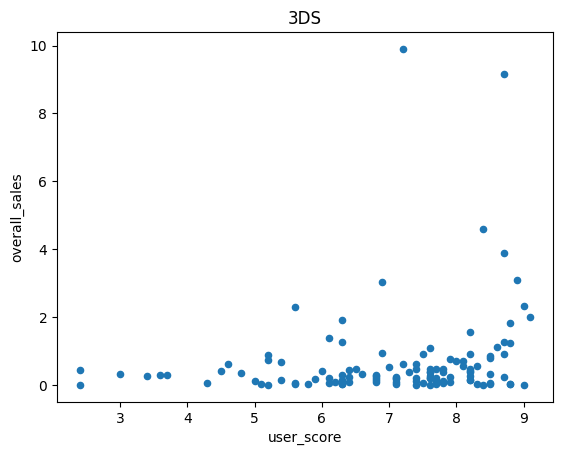

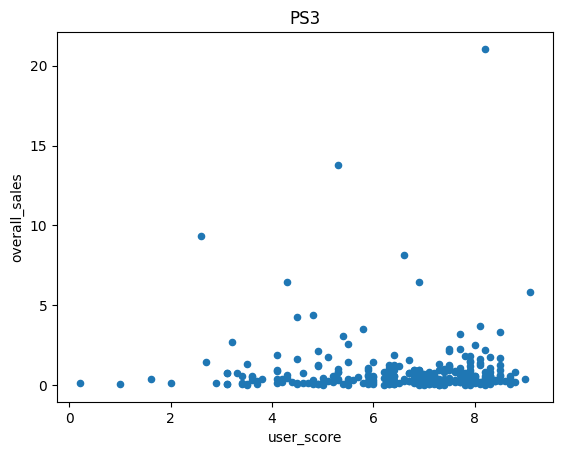

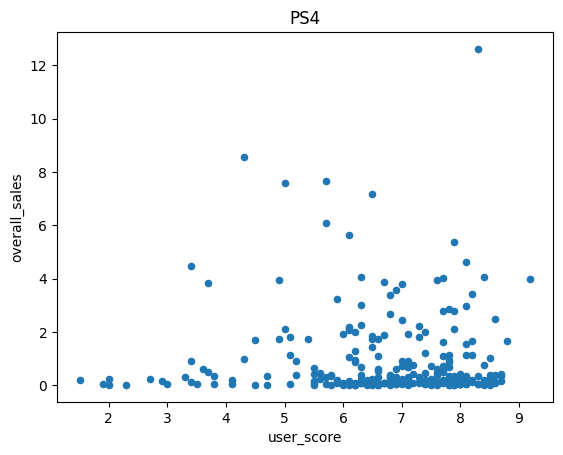

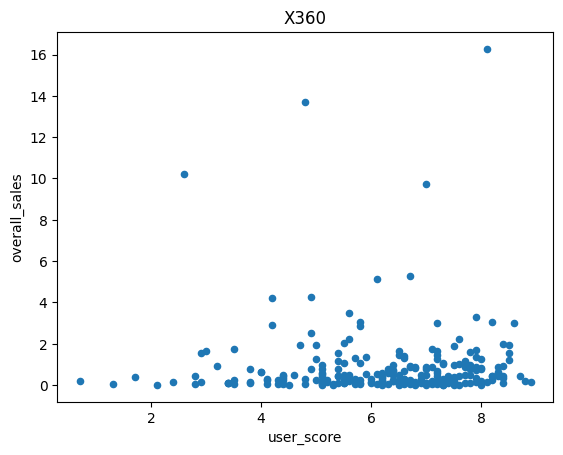

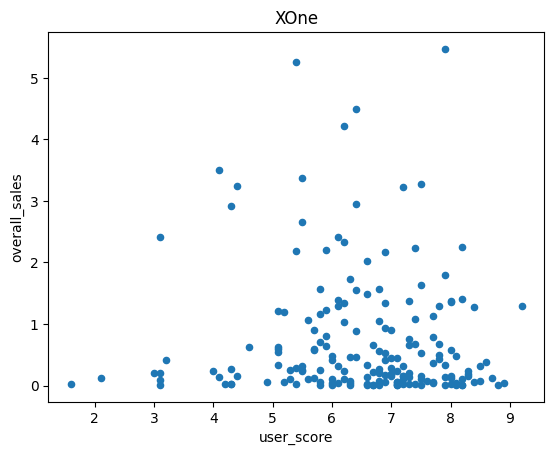

In [114]:
for name, group_data in new_data.groupby('platform'):
    if name in list_of_platform:
        group_data.plot.scatter(x='user_score', y='overall_sales', title=name)

В данном случае похоже, что зависимости нет, но проверим.

In [115]:
for name, group_data in new_data.groupby('platform'):
    if name in list_of_platform:
        print('К. корреляции для платформы', name, 'равен', group_data['user_score'].corr(new_data['overall_sales']))

К. корреляции для платформы 3DS равен 0.19758263411038599
К. корреляции для платформы PS3 равен -0.005143522887113815
К. корреляции для платформы PS4 равен -0.03195711020455643
К. корреляции для платформы X360 равен 0.006163978646213357
К. корреляции для платформы XOne равен -0.06892505328279416


Ситуация значительно хуже чем с оценками критиков, связь на уровне погрешности, кроме платформы 3DS, где она очень слабая.

### Анализ распределения игр по жанрам

Разберемся с популярностью различных жанров.

In [116]:
new_data.groupby('genre')['genre'].count().sort_values(ascending=False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Для наглядности построим график

<Axes: title={'center': 'genre distribution'}, xlabel='genre'>

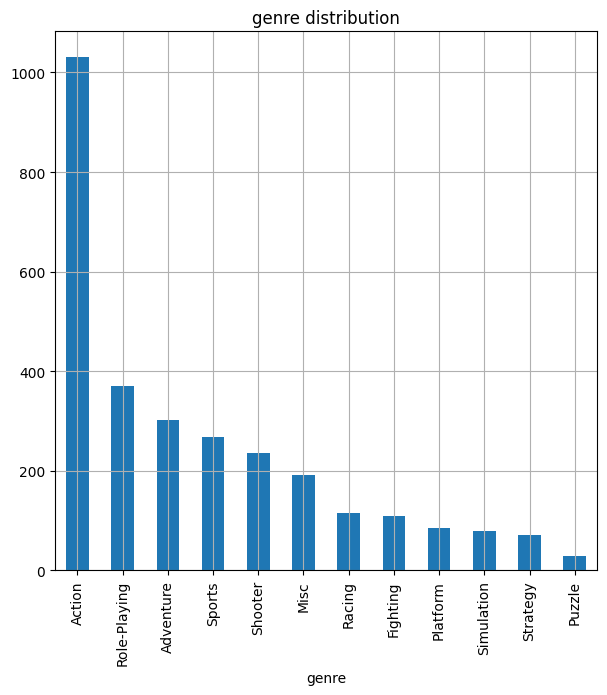

In [117]:
new_data.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(7, 7), title='genre distribution')

Самым популярным жанром с большим отрывом является Action, за ним идут Role-Playing и Adventure. Хорошо, посмотрим, как дела с продажами.

In [118]:
new_data.groupby('genre')['overall_sales'].sum().sort_values(ascending=False)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: overall_sales, dtype: float64

<Axes: title={'center': 'genre distribution'}, xlabel='genre'>

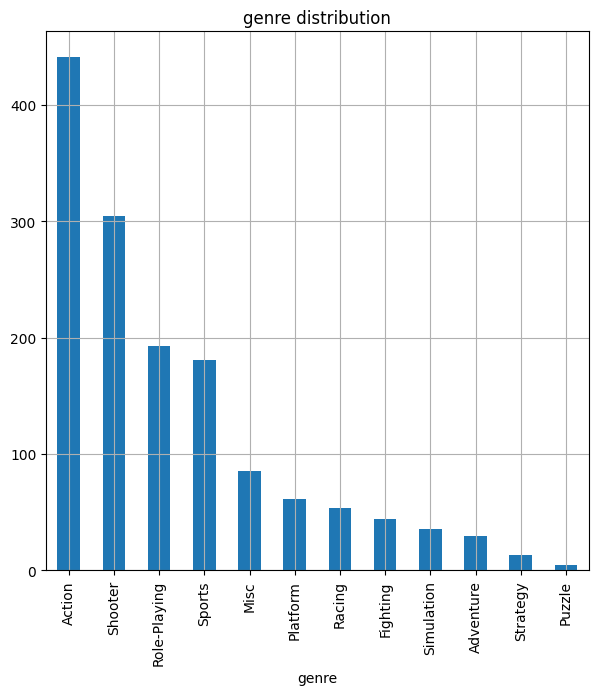

In [119]:
new_data.groupby('genre')['overall_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(7, 7), title='genre distribution')

Первое место аналогично графику популярности, а вот дальше вылез Shooter, а  Role-Playing ушел на третье место, Sport в и там, и там на четвертом, иными словами графики популярности жанров и количества продаж похожи до четвертого места включительно, дальше идут расхождения, кроме того, совпали последние по популярности и продажам жанры - Strategy и Puzzle. Однако, может так полчиться, что жанр "выстрелил" случайно и только на одной платформе, проверим.

In [120]:
new_data.groupby('genre')['overall_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: overall_sales, dtype: float64

[(0.0, 2.0)]

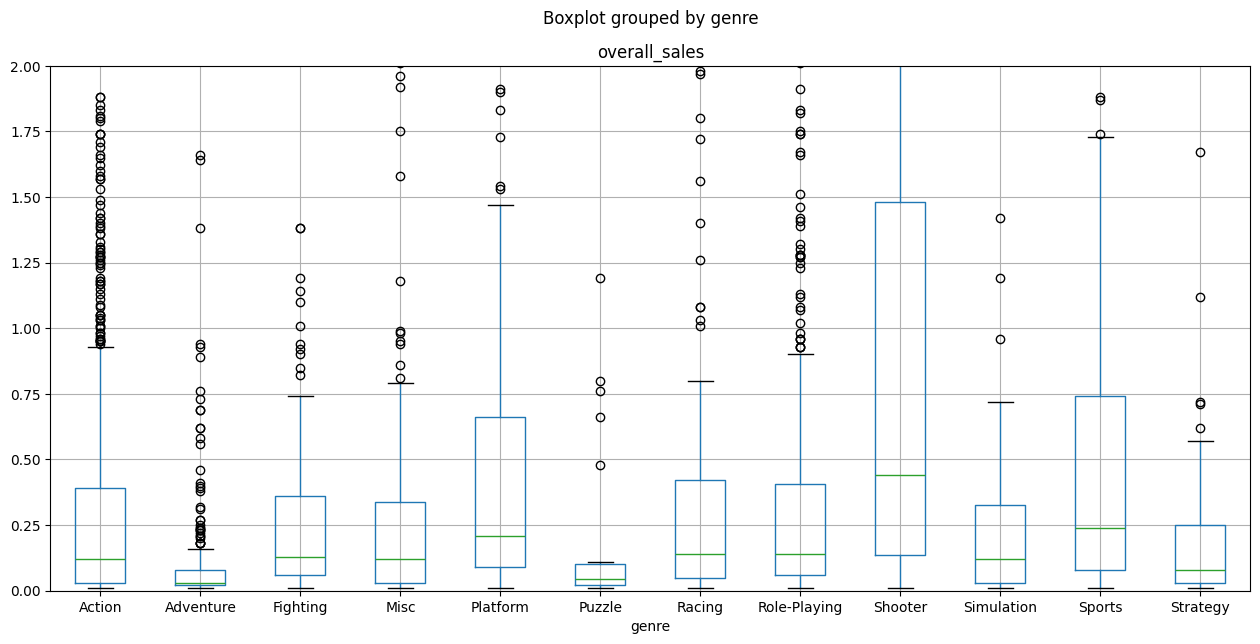

In [121]:
new_data.boxplot(column='overall_sales', by='genre', grid=True, figsize=(15,7)).set(ylim=(0,2))

Здесь ситуация несколько другая, мединные продажи жанра Action не самые выразительные, в отличие от Shooter. Скорректируем пятерку самых удачных жанров по медианным продажам - Shooter, Sports, Platform, Role-Playing и Racing.

Выводы по исследовательскому анализу:
- Таким образом, значительная часть платформ, на которые приходились пики 2007-2010 года на момент 2016 и тем более 2017 уже, мягко говоря, слабоактуальны, поэтому большую часть датасета до 2012 года было решено убрать из дальнейшего анализа. 
- Большая часть даже относительно новых платформ демонстрирует тенденцию к снижению продаж в период с 2012 по 2016 
- Наиболее интересными платформами, с точки зрения автора, являются PS4, XOne и 3DS, как относительно новые, но на рассматриваемый период уже показывающие достойные результаты продаж. Следует с осторожностью подходить к PS3 и X360, за пирод 2012-2016 продажи по ним все еще значительны, но сами консоли уже сильно устарели и их поддержка на момент 2016 года прекращена. 
- Существует средне-слабая зависимость между уровнем продаж и оценкой критиков. 
- Связь между уровнем продаж и оценками игроков отсутствует. 
- Наиболее популярные и наиболее продающиеся жанры совпадают у вершин рейтингов, но расходятся уже с четвертого места, в частности наиболее популярными являются -  Action, Role-Playing, Adventure и Sports, а наиболее продающимися -  Action, Shooter, Role-Playing и Sports, в середине рейтингов есть расхождения, а вот концовки сходятся, наименее популярными и наименее продающимися оказались жанры Strategy и Puzzle. 
- Однако, судя по медианным продажам, не все упомянутые выше жанры дают стабильные продажи, скорректированные по медианам продажам жарны - Shooter, Sports, Platform, Role-Playing и Racing.

## Анализ продаж по регионам

### Популярность платформ

#### Северная Америка

In [122]:
popular_platform_na = new_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
popular_platform_na.head(5)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [123]:
leaders_na = ['X360', 'PS4', 'PS3', 'XOne', '3DS']

Посмотрим на диаграмму и процентное соотношение, здесь и далее, все платформы, которые не попали в топ-5, я буду относить к группе Others.

In [124]:
#функия для подсчета долей
def percentuale(platform, sum_of_platforms):
    return platform / sum_of_platforms * 100

<Axes: title={'center': 'na_sales'}, ylabel='na_sales'>

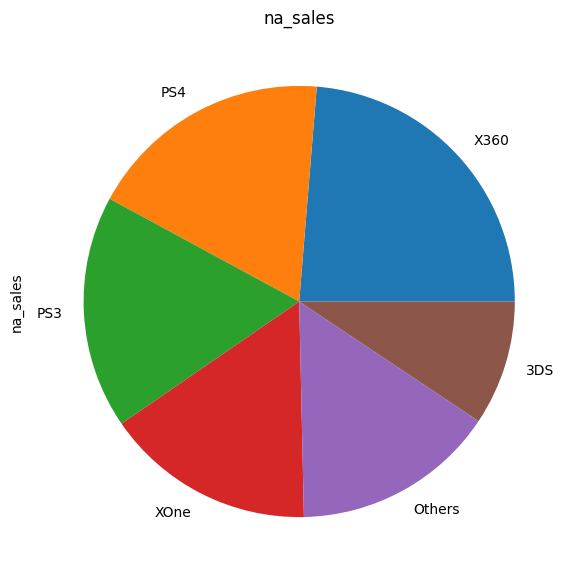

In [125]:
data_for_na = new_data.copy()
data_for_na['platform'] = data_for_na['platform'].where(data_for_na['platform'].isin(leaders_na), 'Others')
top_platforms_na = data_for_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top_platforms_na.plot(kind='pie', grid=True, figsize=(7, 7), title='na_sales') 

In [126]:
percentuale(top_platforms_na, sum(top_platforms_na))

platform
X360      23.698326
PS4       18.400257
PS3       17.493274
XOne      15.757145
Others    15.291808
3DS        9.359189
Name: na_sales, dtype: float64

В регионе NA, он же Северная Америка, самыми популярными платформами оказались X360, PS4, PS3, XOne и 3DS. При этом, лидер - X360, среди этой пятерки, имеет долю около 24%, а последний в списке лидеров 3DS порядка 9%, второе, третье и четвертое места имеют минимальный разброс от 18 до 16 процентов, на остальные платформы приходится порядка 15%.

#### Европа

In [127]:
popular_platform_eu = new_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False) 
popular_platform_eu.head(5)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Аналогично посмотрим на диаграмму и процентное соотношение.

In [128]:
leaders_eu = ['PS4', 'PS3', 'X360', 'XOne', '3DS']

<Axes: title={'center': 'eu_sales'}, ylabel='eu_sales'>

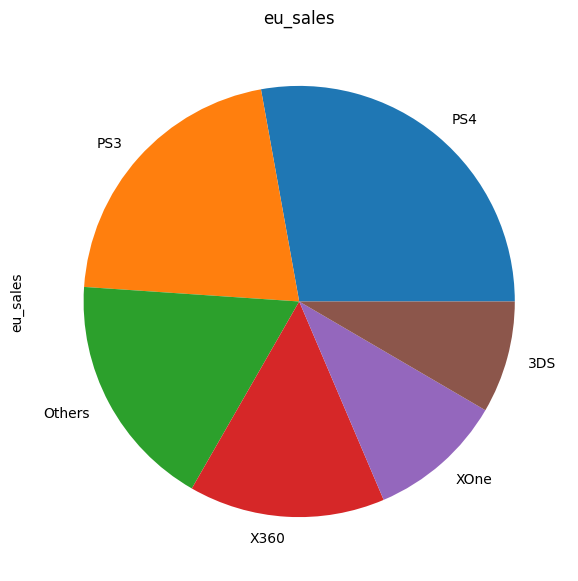

In [129]:
data_for_eu = new_data.copy()
data_for_eu['platform'] = data_for_eu['platform'].where(data_for_eu['platform'].isin(leaders_eu), 'Others') 
top_platforms_eu = data_for_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_eu.plot(kind='pie', grid=True, figsize=(7, 7), title='eu_sales')  

In [130]:
percentuale(top_platforms_eu, sum(top_platforms_eu))

platform
PS4       27.838286
PS3       21.084409
Others    17.781461
X360      14.703445
XOne      10.179156
3DS        8.413243
Name: eu_sales, dtype: float64

В регионе EU, он же Европа, самыми популярными платформами оказались PS4, PS3, X360, XOne и 3DS. Лидер - PS4 имеют долю рынка порядка 28%, отстающий 3DS же - 8,4%. Второе место - PS3, отстает от первого на 6% и занимает порядка 21% рынка, на третье и четвертом местах расположились X360 и XOne с долями рынка в 15 и 10 процентов соответственно. На оставшиеся платформы приходится порка 17%.

#### Япония

In [131]:
popular_platform_jp = new_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False) 
popular_platform_jp.head(5)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

И снова посмотрим на диаграмму и процентное соотношение.

In [132]:
leaders_jp = ['3DS', 'PS3', 'PSV', 'WiiU', 'PS4']

<Axes: title={'center': 'jp_sales'}, ylabel='jp_sales'>

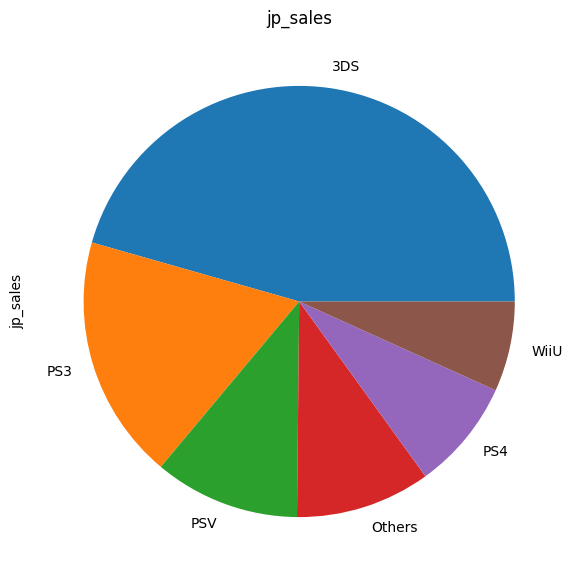

In [133]:
data_for_jp = new_data.copy()
data_for_jp['platform'] = data_for_jp['platform'].where(data_for_jp['platform'].isin(leaders_jp), 'Others') 
top_platforms_jp = data_for_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top_platforms_jp.plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales') 

В регионе JP, он же Япония, самыми популярными платформами оказались 3DS, PS3, PSV и PS4.

In [134]:
percentuale(top_platforms_jp, sum(top_platforms_jp))

platform
3DS       45.586250
PS3       18.324852
PSV       10.925330
Others    10.120469
PS4        8.287465
WiiU       6.755634
Name: jp_sales, dtype: float64

На первых пяти местах расположились 3DS, PS3, PSV, PSV, PS4, при этом на долю 3DS приходится практически 46 процентов рынка, тогда как на WiiU - 7%. При PS3 на втором месте занимает уже только 18 процентов рынка, а разница между  третьим, четвертым и пятым местами небольшая. На долю остальных платформ приходится 10%.

In [135]:
#new_data = data.query('year_of_release >= 2012')

### Популярность жанров

#### Северная Америка

In [136]:
popular_genre_na = new_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
popular_genre_na.head(5) 

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [137]:
list_of_genres = list(popular_genre_na.index) 
list_of_genres = list_of_genres[:5]
list_of_genres

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

<Axes: title={'center': 'na_sales_per_genre'}, ylabel='na_sales'>

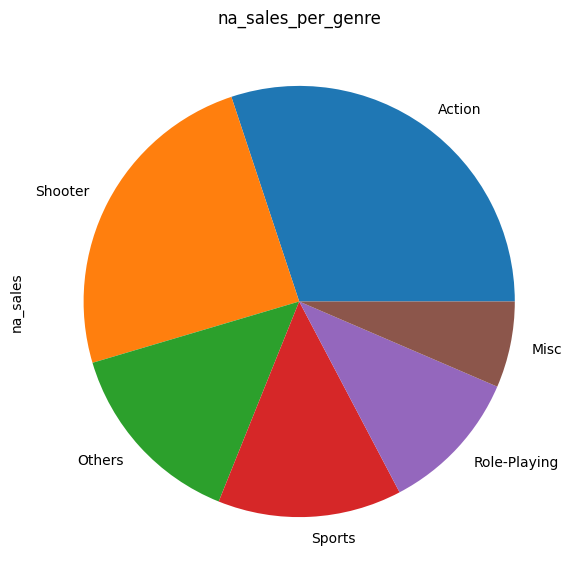

In [138]:
data_for_na['genre'] = data_for_na['genre'].where(data_for_na['genre'].isin(list_of_genres), 'Others') 
top_genres_na = data_for_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_genres_na.plot(kind='pie', grid=True, figsize=(7, 7), title='na_sales_per_genre')  

In [139]:
percentuale(top_genres_na, sum(top_genres_na))

genre
Action          30.092898
Shooter         24.497013
Others          14.322216
Sports          13.795963
Role-Playing    10.829653
Misc             6.462257
Name: na_sales, dtype: float64

Самым популярным жанром в Северной Америке оказался Action с долей в 30%, а на последнем месте среди топ-5 оказался Misc с долей порядка 6%. На втором месте расположился Shooter с долей поряка 24%, на 3 и 4 - Sports и Role-Playing c долями в 11 и 6 процентов соответственно. 

#### Европа

In [140]:
popular_genre_eu = new_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False) 
popular_genre_eu.head(5)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [141]:
list_of_genres = list(popular_genre_eu.index) 
list_of_genres = list_of_genres[:5] 
list_of_genres

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

<Axes: title={'center': 'eu_sales_per_genre'}, ylabel='eu_sales'>

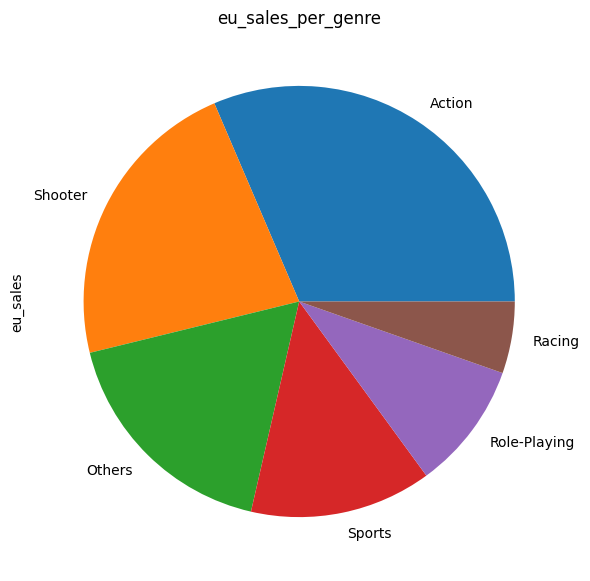

In [142]:
data_for_eu['genre'] = data_for_eu['genre'].where(data_for_eu['genre'].isin(list_of_genres), 'Others') 
top_genres_eu = data_for_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_eu.plot(kind='pie', grid=True, figsize=(7, 7), title='eu_sales_per_genre')

In [143]:
percentuale(top_genres_eu, sum(top_genres_eu))

genre
Action          31.439170
Shooter         22.388619
Others          17.580206
Sports          13.632059
Role-Playing     9.575392
Racing           5.384555
Name: eu_sales, dtype: float64

В Европе первые четыре места аналогичны NA - Action(31%), Shooter(22%), Sports(14) и Role-Playing(10%), а вот на последнем оказался Racing(5%), на долю остальных жанров приходится 18%.

#### Япония

In [144]:
popular_genre_jp = new_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False) 
popular_genre_jp.head(5)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

In [145]:
list_of_genres = list(popular_genre_jp.index) 
list_of_genres = list_of_genres[:5] 
list_of_genres

['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']

<Axes: title={'center': 'jp_sales_per_genre'}, ylabel='jp_sales'>

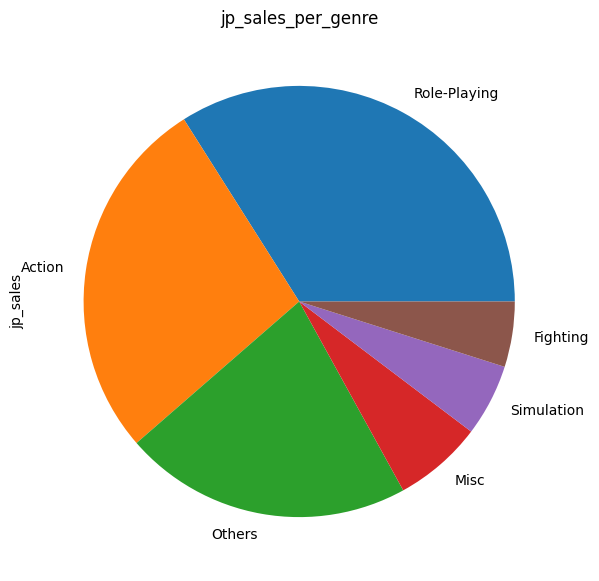

In [146]:
data_for_jp['genre'] = data_for_jp['genre'].where(data_for_jp['genre'].isin(list_of_genres), 'Others') 
top_genres_jp = data_for_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_genres_jp.plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales_per_genre')

In [147]:
percentuale(top_genres_jp, sum(top_genres_jp))

genre
Role-Playing    33.980683
Action          27.417177
Others          21.616990
Misc             6.677744
Simulation       5.405546
Fighting         4.901859
Name: jp_sales, dtype: float64

А вот в Японии популярность жанров сильно отличается - самым популярным оказался Role-Playing с долей(34%), за ним идут Action(27%), Misc(7%), Simulation(5%) и Fighting(5%).

### Анализ влияния рейтинга ESRB

#### Северная Америка

Напомню, что рейтинг ESRB предназначен для США и Канады и может мало что значит на других рынках, особенно на азиатских, поставим заглушку для удобства анализа.

In [148]:
#ставим заглушку
new_data['rating'] = new_data['rating'].fillna('Plug')

In [149]:
new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M       231.57
E       114.37
Plug    103.31
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

In [150]:
percentuale(new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False), 
            sum(new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)))

rating
M       39.184730
E       19.352928
Plug    17.481429
E10+    12.809449
T       11.171464
Name: na_sales, dtype: float64

<Axes: title={'center': 'jp_sales_per_genre'}, ylabel='na_sales'>

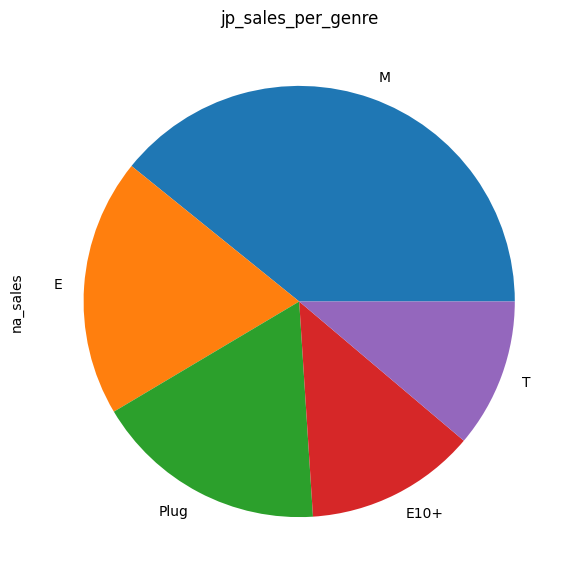

In [151]:
new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)\
                                      .plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales_per_genre')

Итак, порядка 39% всех проданных игр в Северной Америке приходится на рейтинг "M", то есть для людей возраста 17+, вторым по популярности идет "E", то есть для всех, игры с рейтингом "E10+" и "Teen" занимают последние места с долями 12 и 11 процетов соответственно. Неоцененных игр порядка 17%.

#### Европа

In [152]:
new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M       193.96
E       113.03
Plug     91.50
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64

In [153]:
percentuale(new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False), 
            sum(new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)))

rating
M       38.269997
E       22.301803
Plug    18.053747
E10+    10.924983
T       10.449469
Name: eu_sales, dtype: float64

<Axes: title={'center': 'jp_sales_per_genre'}, ylabel='eu_sales'>

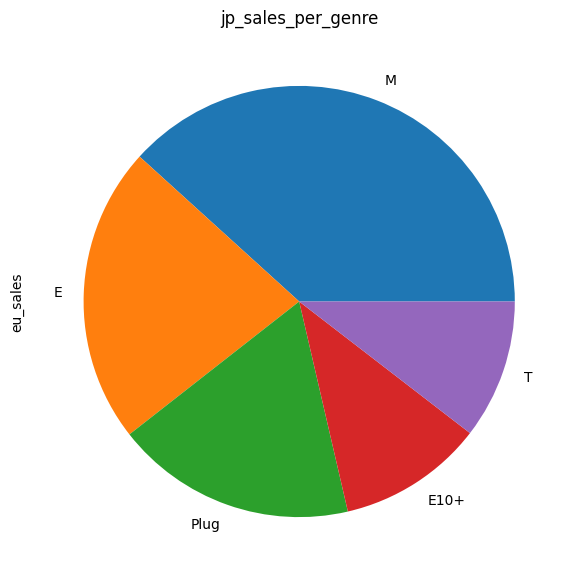

In [154]:
new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)\
                                      .plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales_per_genre')

Ситуация практически аналогичная той, что была в Северной Америке, примернок 38% на рейтинг M, чуть больше 22% на "E" и по 10% на "E10+" и "T". Доля неоцененных игр составляет 18%.

#### Япония

In [155]:
new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
Plug    108.84
E        28.33
T        26.02
M        21.20
E10+      8.19
Name: jp_sales, dtype: float64

In [156]:
percentuale(new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False), 
            sum(new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)))

rating
Plug    56.516772
E       14.710770
T       13.511268
M       11.008412
E10+     4.252778
Name: jp_sales, dtype: float64

<Axes: title={'center': 'jp_sales_per_genre'}, ylabel='jp_sales'>

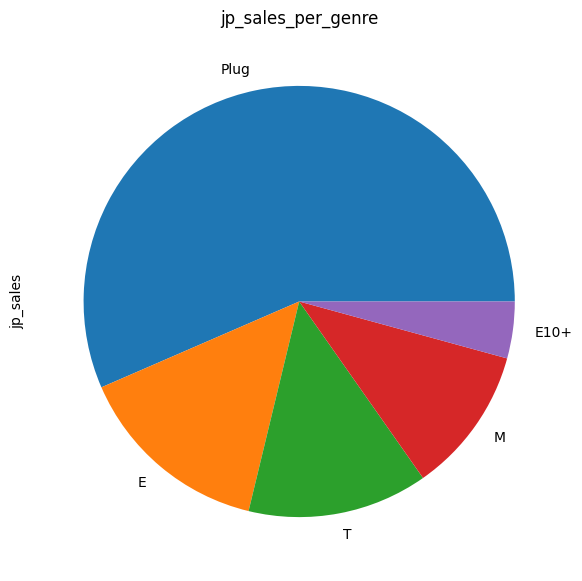

In [157]:
new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)\
                                      .plot(kind='pie', grid=True, figsize=(7, 7), title='jp_sales_per_genre')

А вот в Японии положение дел значительно отличается, большая часть игр - 57% не имеют рейтинга, рейтинги "E", "T" и "M" имеют от 15 до 11 процентов, на последнем месте расположился E10+ со значением в 4 процента.

### Вывод по анализу продаж по регионам

Популярность платформ по регионам разная:
- В Северной Америке наиболее популярны X360, PS4, PS3, XOne и 3DS с долями рынка от 24 до 9%, на оставшиеся платформы приходится порядка 15%.
- В Европе наиболее популярны PS4, PS3, X360, XOne и 3DS с долями рынка от 28 до 8 процентов, на оставшиеся платформы приходится около 18%.
- В Японии наиболее популярны 3DS, PS3, PSV, PSV, PS4 с долями рынка от 46 до 7 процентов, на оставшиеся платформы приходится примерно 10%. Хочется отметить, что 3DS - платформ, замыкающая топы в Северной Америке и Европе, в Японии его возглавляет причем с долей рынка близкой к половине.  

В популярности жанров по регионам есть закономерности: 
- Пятерка самых популярных жанров в Северной Америке и Европе совпадает за исключением замыкающего жарна, в Северной Америке это - Action, Shooter, Sports, Role-Playing и Misk, в Европе соответственно Action, Shooter, Sports, Role-Playing и Racing, при этом даже по долям распределения жанры достаточно близки. 
- Популярные жанры в Японии сильно отличаются от Северной Америки и Европы и составляют Role-Playing, Action, Misc, Simulation и Fighting, из похожего здесь только Action на втором месте, что близко к значениям этого жанра в Европе и Северной Америке. 

Влияние рейтинга ESRB: 
- Ситуация в Северной Америке и Европе очень похожа, порядка 40% рынка рынка приходится на игры с рейтингом "M", чуть больше 20% на "E" и по 10-15% на "E10+" и "T". 
- Азиатский рынок существенно отличается, больше половины игр рейтинга вообще не имеют, рейтинги "E", "T" и "M" занимают долю рынка от 15 до 11 процентов, на последнем месте расположился E10+ со значением в 4 процента.

## Проверка гипотез

### Поиск различий в пользовательских оценках в зависимости от платформы

Для начала определимся различаются ли отзывы пользователей в зависимости от платфорымы, рассмотрим PC и XOne. 
Соотвественно:
- Н0 - Отзывы игроков на этих двух платформах не отличаются. 
- H1 - Существует различие в отзывах людей, играющих на этих двух платформах.

In [158]:
alpha = 0.05 

results = st.ttest_ind(
                       new_data[(new_data['platform'] == 'PC') & (new_data['user_score'].notna())]['user_score'], 
                       new_data[(new_data['platform'] == 'XOne') & (new_data['user_score'].notna())]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Иными словами, у нас недостаточно оснований, чтобы заявлять о том, что игроки по разному оценивают игры с платформ PC и XOne.

### Поиск различий в пользовательских оценках в зависимости от жанров

Посмотрим, отличаются ли пользовательские оценки в зависимости от жанров игры - Action и Sports. Соотсветсвенно:
- H0 - Различия нет, игроки оценивают эти два жанра одинаково. 
- H1 - Существует различие в оценках между этими двумя жанрами игроками. 

In [159]:
alpha = 0.01 

results = st.ttest_ind(
                       new_data[(new_data['genre'] == 'Action') & (new_data['user_score'].notna())]['user_score'], 
                       new_data[(new_data['genre'] == 'Sports') & (new_data['user_score'].notna())]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Следует понимать, что у нас нет никаких оснований, чтобы судить о причинах, мы можем только предположить, что разница могла быть вызвана самим пользовательским предпочтением, качеством игр или чем-то еще. 

### Выводы по проверке гипотез

- В данном разделе был использован двусторонний тест для независимых выборок, поскольку технически возможно отклонение изучаемого признака(оценок пользователей) в любую сторону, а выборки независимы. 
- Гипотезы формулируются исходя из принципа, что нулевая гипотеза говорит об отсутствии зависимости или различия, альтернативная гипотеза говорит, соответственно, об обратном. В нашем случае при проверке различий в пользовательских оценках в зависимости от жанров игры - Action и Sports, мы сначала утверждаем, что различий нет в нулевой гипотезе и что они есть в первой. Аналогично строятся гипотезы для второго задания, мы утверждаем в нулевой гипотезе то, что игроки оценивают эти два жанра одинаково, в альтернативной же мы говорим о том, что различия в оценках есть.

## Общий вывод

**Динамика релиза и продаж игр**

- Значительная часть платформ, на которые приходились пики 2007-2010 года на момент 2016 и тем более 2017 уже неактуальны 
- Большая часть даже относительно новых платформ демонстрирует тенденцию к снижению продаж в период с 2012 по 2016
- Существует средне-слабая зависимость между уровнем продаж и оценкой критиков.
- Связь между уровнем продаж и оценками игроков отсутствует.
- Наиболее популярные и наиболее продающиеся жанры совпадают у вершин рейтингов, в частности наиболее популярными являются - Action, Role-Playing, Adventure и Sports, а наиболее продающимися - Action, Shooter, Role-Playing и Sports, в середине рейтингов есть расхождения, а вот концовки сходятся, наименее популярными и наименее продающимися оказались жанры Strategy и Puzzle.  Однако, не все эти жанры дают стабильных доход, наиболее высокие медианные продажи показали Shooter, Sports, Platform, Role-Playing и Racing.
 

**Региональный анализ** 

- Популярность платформ по регионам разная. В Северной Америке наиболее популярны X360, PS4, PS3, XOne и 3DS, в Европе наиболее популярны PS4, PS3, X360, XOne и 3DS, в Японии наиболее популярны 3DS, PS3, PSV, PSV, PS4. Следует отметить, что на занимающую нижние строчки в рейтинге топ-5 популярных консолей в Северной Америке и Европе 3DS в Японии приходится почти половина рынка. 
- Пятерка самых популярных жанров в Северной Америке и Европе совпадает за исключением замыкающего жарна, в Северной Америке это - Action, Shooter, Sports, Role-Playing и Misk, в Европе соответственно Action, Shooter, Sports, Role-Playing и Racing, при этом даже по долям распределения жанры достаточно близки. Популярные жанры в Японии сильно отличаются от Северной Америки и Европы и составляют Role-Playing, Action, Misc, Simulation и Fighting, из похожего здесь только Action на втором месте, что близко к значениям этого жанра в Европе и Северной Америке.

**Проверка статистических гипотез** 

- Достоверных различий в оценках игр их-за разных игровых платформ, Xbox One и PC, обнаружить не удалось. 
- Был получен значимый результат при проверке различий пользовательских оценок в зависимости от жанра. Иными словами, оценки игроков по отношению к играм с жанрами Action и Sports действительно отличаются.  


**Рекомендации по использованию рекламного бюджета** 
- С точки зрения автора следует обратить внимание на платформы PS4 и XOne, они достаточно новые, при этом уже показывают хорошие медианные показатели продаж, кроме того, в Японии можно обратить внимание на 3DS. 
- Следует с осторожностью подходить к PS3 и X360, за период 2012-2016 продажи по ним все еще значительны, но сами консоли сильно устарели и их поддержка на момент 2016 года прекращена. 
- Наиболее интересными жанрами со стабильным доходом в целом являются Shooter и Sports, он же хороши для Европы и Северной Америки. Однако, для Японии более предпочтительны Role-Playing и Action. 
- Касаемо рейтинга, в Европе и Северной Америке предпочтительно обращать внимание на рейтинг "M", иногда на "E". В Японии же на рейтинг следует смотреть в последнюю очередь, если вообще смотреть, больше половины продающихся игр его в принципе не имеют. 